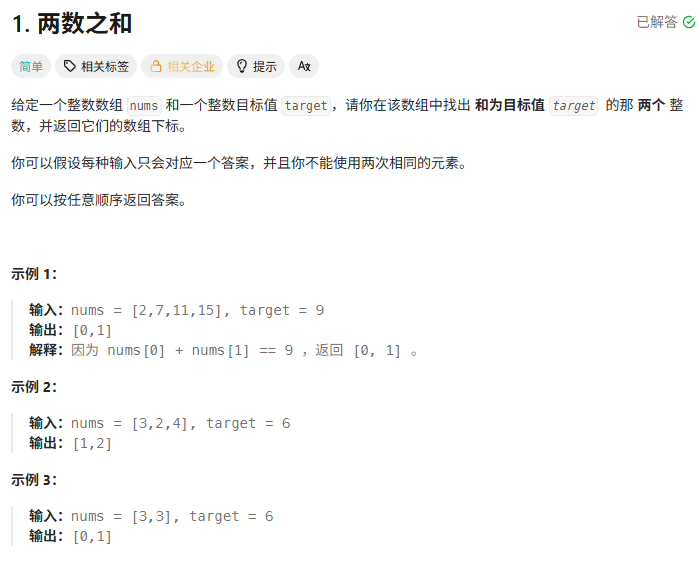

In [2]:
from typing import List
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        if not nums: return None
        # 检索下标元素
        for left in range(len(nums)):
            left_value = target - nums[left]
            right = 0
            if left_value in nums:
                right = nums.index(left_value)
                if left != right: return [left, right]

if __name__ == '__main__':
    s = Solution()
    print(s.twoSum([3,2,4], 6))

[1, 2]


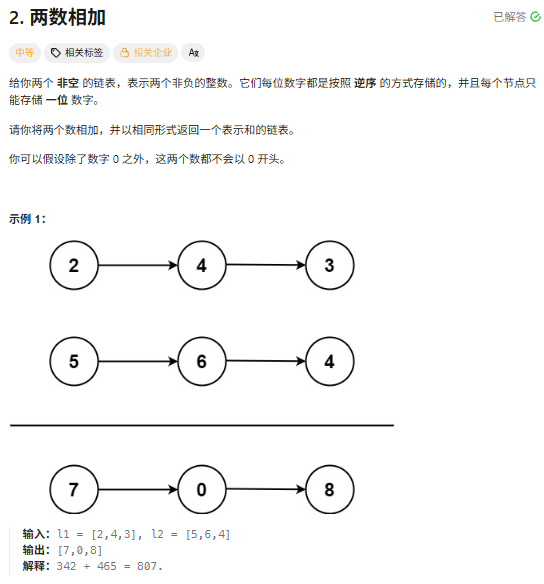

In [23]:
from typing import Optional

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode],
     l2: Optional[ListNode]) -> Optional[ListNode]:
        dummy = ListNode(0)
        current = dummy
        carry = 0
        while l1 or l2 or carry:
            val1 = l1.val if l1 else 0
            val2 = l2.val if l2 else 0
            total = val1 + val2 + carry
            carry = total // 10
            digit = total % 10
            current.next = ListNode(digit)
            current = current.next
            if l1: l1 = l1.next
            if l2: l2 = l2.next
        return dummy.next

if __name__ == '__main__':
    s = Solution()
    l1 = ListNode(2, ListNode(4, ListNode(3)))
    l2 = ListNode(5, ListNode(6, ListNode(4)))
    result = s.addTwoNumbers(l1, l2)
    while result:
        print(result.val, end=" ")
        result = result.next

7 0 8 

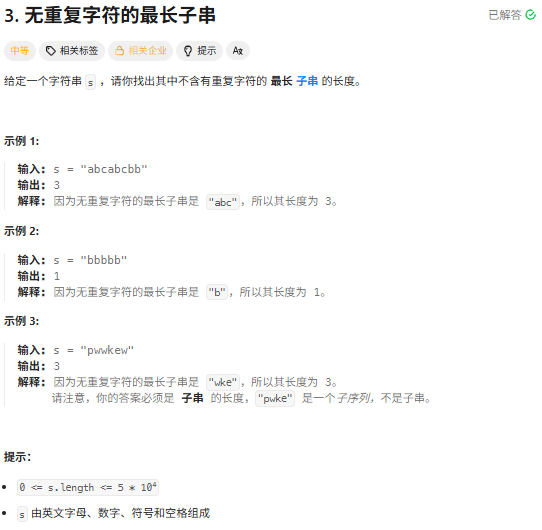

In [24]:
class Solution:
    def lengthOfLongestSubstring(self, s:str) -> int:
        if not s: return 0
        char_index = {}
        left = 0
        max_length = 0
        for right in range(len(s)):
            if s[right] in char_index and char_index[s[right]] >=left:
                left = char_index[s[right]] + 1
            char_index[s[right]] = right
            max_length = max(max_length, right-left+1)
        return max_length

if __name__ == '__main__':
    s = Solution()
    print(s.lengthOfLongestSubstring('abcabcbb'))

3


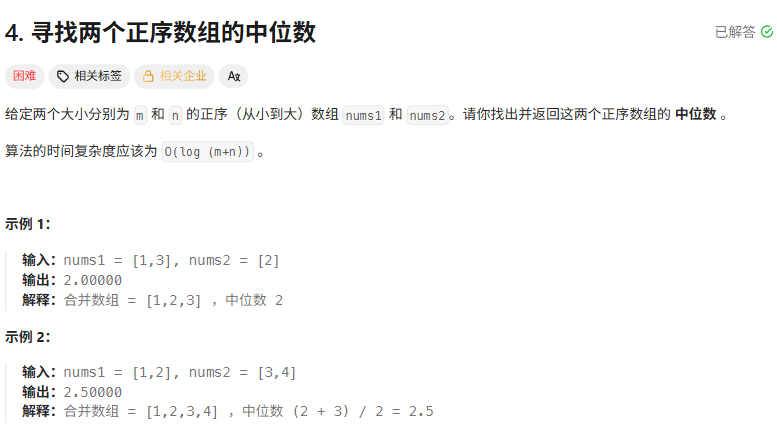

In [1]:
from math import ceil
class Solution(object):
    def findMedianSortedArrays(self, nums1, nums2):
        # 需要找到最小的 target 个数字
        len1, len2 = len(nums1), len(nums2)
        target = (len1 + len2) // 2
        is_even = (len1 + len2) % 2 == 0    # 偶数长度的数组
        # 补上边界，不用考虑数组被用完的情况
        nums1.insert(0, -1000001)
        nums2.insert(0, -1000001)
        nums1.append(1000001)
        nums2.append(1000001)
        left1, left2 = 0, 0  # 当前已被纳入最小的 target 个数字的位置，边界不算在内
        while left1 + left2 < target:
            plus = target - (left1 + left2)  # 还需要补充的数字个数
            next1 = int(min(left1 + ceil(plus/2.0), len1 + 1)) # 两个数组都往前走缺的一半，看谁的被采纳
            next2 = int(min(left2 + ceil(plus/2.0), len2 + 1))
            if nums1[next1] < nums2[next2]: # 小的采纳，大的不管
                left1 = next1
            else:
                left2 = next2
        # 找到最小的 target 个数字
        if is_even:
            # 总数是偶数个则返回最小里面最大的和最大里面最小的，两个数的平均值
            return (max(nums1[left1], nums2[left2]) + min(nums1[left1+1], nums2[left2+1]))/2.0
            # 总数是奇数个则返回剩余数字最小的一个
        else:
            return min(nums1[left1+1], nums2[left2+1])

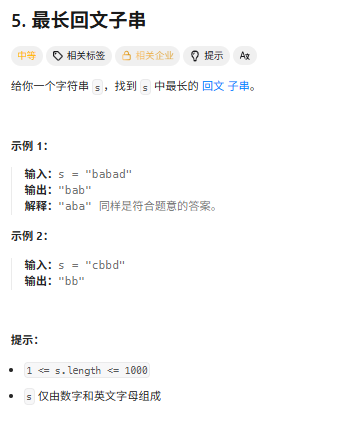

In [2]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        # 定义回文判断函数
        def JudgeCircleString(left: int, right:int) -> str:
            while left >=0 and right < len(s) and s[left]==s[right]:
                left -=1 
                right +=1
            # 注意循环失效是left-1
            return s[left+1:right]
        longest = ''
        for i in range(len(s)):
            # 寻找偶数回文和奇数回文
            res_even = JudgeCircleString(i, i+1)
            res_odd = JudgeCircleString(i, i)
            # 更新当前最长的回文串
            res = max(res_even, res_odd, key=len)
            if len(res) > len(longest): longest = res
        return longest

class BestSolution:
    def longestPalindrome(self, s: str) -> str:
        if not s or len(s) == 1:
            return s
        # 预处理字符串
        t = '#' + '#'.join(s) + '#'
        n = len(t)
        halflen = [0] * n
        boxm = boxr = maxi = 0
        for i in range(n):
            # 利用对称性快速确定初始回文半径
            mirror = 2 * boxm - i
            if i < boxr:
                halflen[i] = min(boxr - i, halflen[mirror])
            # 中心扩展
            a, b = i - halflen[i] - 1, i + halflen[i] + 1
            while a >= 0 and b < n and t[a] == t[b]:
                halflen[i] += 1
                a -= 1
                b += 1
            # 更新最远右边界及其中心
            if i + halflen[i] > boxr:
                boxm = i
                boxr = i + halflen[i]
            # 更新最长回文信息
            if halflen[i] > halflen[maxi]:
                maxi = i
        # 还原原始字符串中的最长回文子串
        start = (maxi - halflen[maxi]) // 2
        end = start + halflen[maxi]
        return s[start:end]
        
if __name__ == '__main__':
    s = Solution()
    bs = BestSolution()
    print(s.longestPalindrome('babad'))
    print(bs.longestPalindrome('babad'))


bab
bab


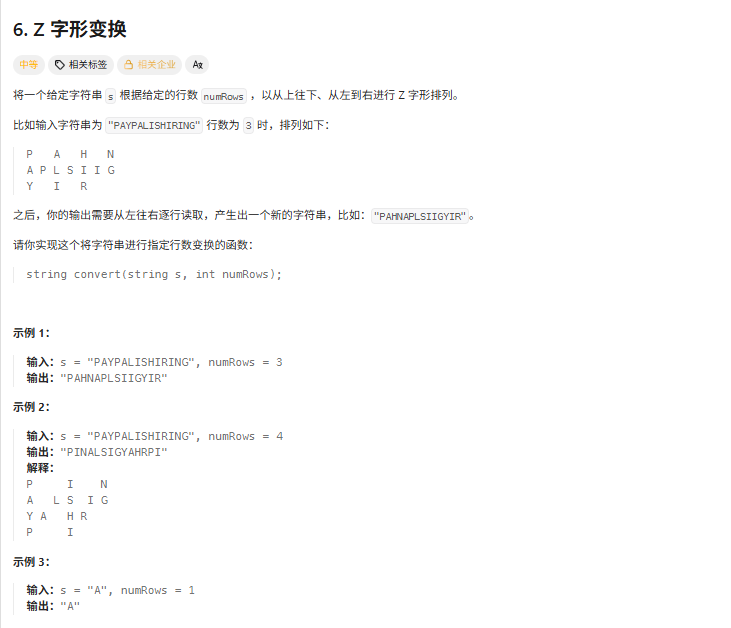

In [3]:
class Solution:
    """按照构造Z字形得顺序进行构造"""
    def convert(self, s: str, numRows: int) -> str:
        if len(s) <= numRows or numRows ==1 : return s
        # 初始化每一行的字符列表
        rows = [''] * numRows
        current_row = 0
        down = False
        for char in s:
            rows[current_row] += char
            # 到达最上行或最下行时改变方向
            if current_row == 0 or current_row == numRows - 1:
                down = not down
            # 更新当前行号
            current_row += 1 if down else -1
        # 拼接所有行的字符
        return ''.join(rows)

if __name__ == '__main__':
    s = Solution()
    print(s.convert("PAYPALISHIRING", 3))

PAHNAPLSIIGYIR


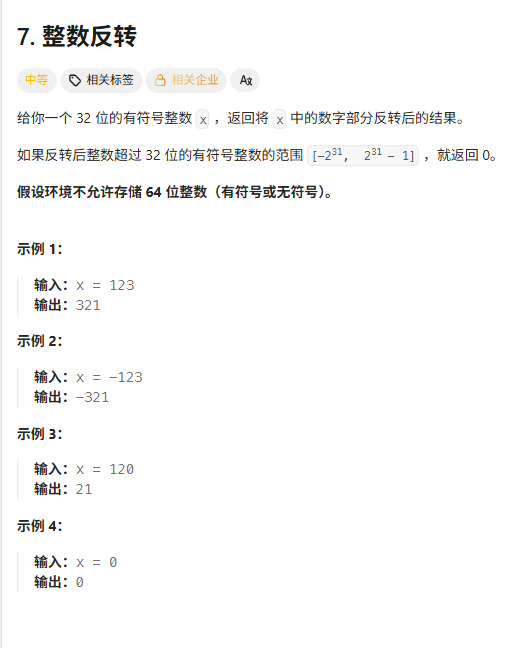

In [13]:
class Solution:
    def reverse(self, x: int) -> int:
        nums = []
        flag = True
        prefix = True
        if x>=0: prefix = True
        else: prefix = not prefix
        x = abs(x)
        while flag:
            num = x % 10 
            if num != x: nums.append(num)
            else: 
                nums.append(num)
                flag = False
            x = x // 10
        output = 0
        for i, num in enumerate(nums):
            output += num*(10**(len(nums)-i-1))
        if -2**31 <= output <=2**31-1:
            if not prefix: return -output
            else: return output
        else: return 0
                
                       
if __name__ == '__main__':
    s = Solution()
    print(s.reverse(534236469))

964632435


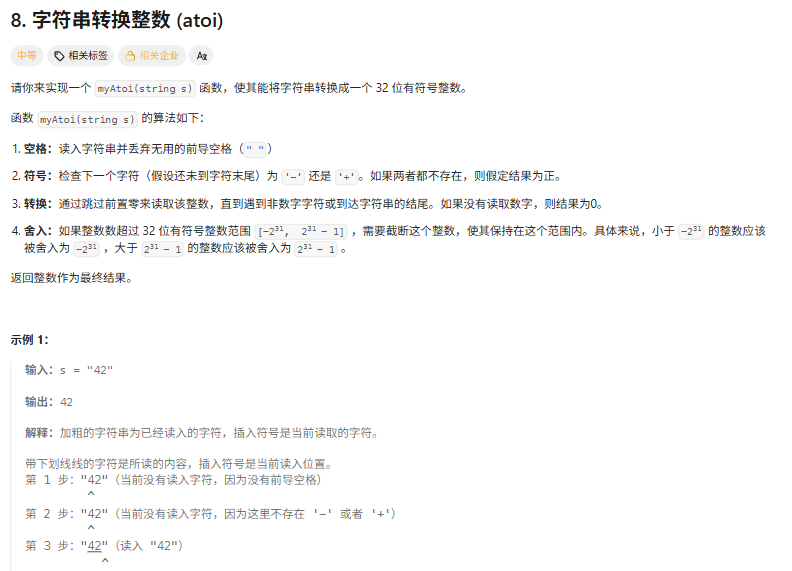

In [58]:
class Solution:
    def myAtoi(self, s: str) -> int:
        INT_MAX = 2**31 - 1
        INT_MIN = -2**31
        result = 0
        prefix = 1
        s = s.strip()
        if not s: return 0
        # 提取数字串
        if s[0] in ['-', '+']: 
            prefix = -1 if s[0] == '-' else 1
            s = s[1:]
        # 转换为数字
        for c in s:
            if not c.isdigit(): break
            result = result * 10 + int(c)
        result = result * prefix
        if result < INT_MIN: return INT_MIN
        if result > INT_MAX: return INT_MAX
        else: return result

if __name__ == '__main__':
    s = Solution()
    print(s.myAtoi(" 65665456cjskbjdb165165"))


65665456


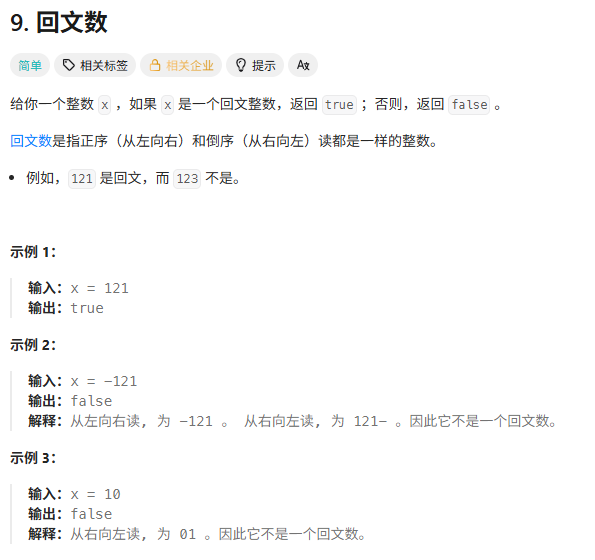

In [ ]:
class Solution:
    def isPalindrome(self, x: int) -> bool:
        strnum = str(x)
        print(strnum)
        left, right = 0, len(strnum)-1
        # 初始中值位置索引
        if len(strnum)%2==1: left = right = (len(strnum)-1)//2
        else: left = len(strnum)//2-1; right = left+1
        # 判断回文数字
        while left>=0 and right<=len(strnum)-1:
            if strnum[left] != strnum[right]: return False
            left -= 1; right += 1
        return True

class Solution:
    """使用倒序的方式,比对前后两半的数字是否相等
    类似数字10是特例,主要是注意相等条件的对比"""
    def isPalindrome(self, x:int):
        if x<0 or (x%10==0 and x!=0): return False 
        # 定义x的逆序数
        y = 0
        while x>y:
            y = y*10 + x%10
            x = x//10
            print(f'x: {x}, y: {y}')
        return x==y or x==y//10
            
if __name__ == '__main__':
    s = Solution()
    print(s.isPalindrome(1123456026543211))

x: 112345602654321, y: 1
x: 11234560265432, y: 11
x: 1123456026543, y: 112
x: 112345602654, y: 1123
x: 11234560265, y: 11234
x: 1123456026, y: 112345
x: 112345602, y: 1123456
x: 11234560, y: 11234562
False


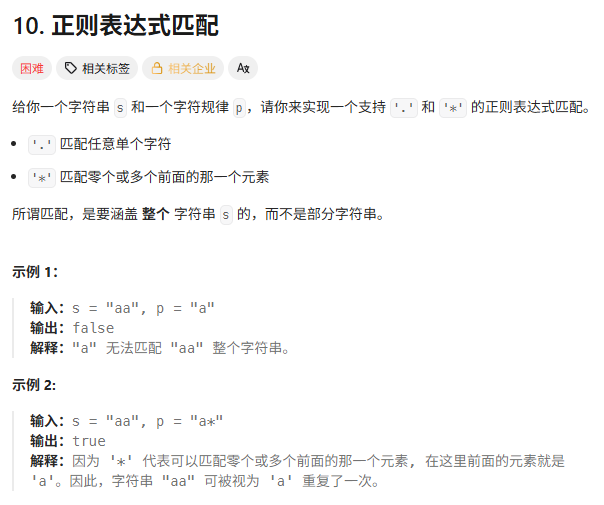  

In [ ]:
class Solution:
    """创建(m+1)x(n+1) 的二维数组来存储中间结果，所以空间复杂度是 O(m*n)  
时间开销在于填充DP表的过程,因此总的时间复杂度是 O(m*n)"""
    def isMatch_orig(self, s: str, p: str) -> bool:
        # 判断基础条件
        if not 1<= len(s)<= 20 or not 1<= len(p)<= 20: return None
        ls, lp = len(s), len(p)
        # 构造动态规划表并初始化
        dp = [[False]*(lp+1) for _ in range(ls+1)]
        dp[0][0] = True
        for j in range(2, lp+1):
            if p[j-1]=='*':    dp[0][j]=dp[0][j-2]
        # 状态转移方程
        for i in range(1, ls+1):
            for j in range(1, lp+1):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   # 
                if p[j-1]=="*":
                    dp[i][j]= dp[i][j-2] or (dp[i-1][j] and (s[i-1]==p[j-2] or p[j-2]=='.'))                                                                      
                else:
                    dp[i][j]= dp[i-1][j-1] and (s[i-1]==p[j-1] or p[j-1]=='.')
        for i in range(ls+1):
            print(dp[i])
        return dp[ls][lp]

if __name__ == '__main__':
    s = Solution()
    print(s.isMatch_orig("aaabbb", "a.*"))

[True, False, False, False]
[False, True, False, True]
[False, False, True, True]
[False, False, False, True]
[False, False, False, True]
[False, False, False, True]
[False, False, False, True]
True


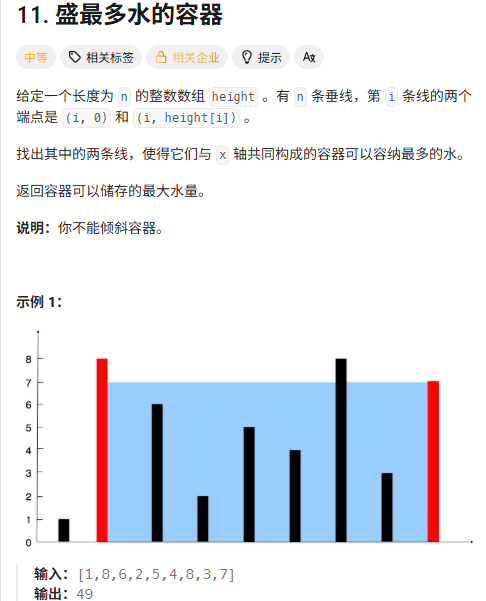  
使用两个指针分别指向数组的两端，计算当前指针所形成的容器的面积，并逐步向内移动较短的那根指针。这样可以确保每次移动都能尽可能地找到更高的边界，从而有机会获得更大的面积。通过不断更新最大面积，最终得到能容纳最多水的容器。这种方法的时间复杂度为O(n)，避免了暴力解法的高时间复杂度。

In [ ]:
from typing import List
class Solution:
    """两次循环搜索出最大面积,具有对称性
    时间复杂度O(n^2)过高"""
    def maxArea(self, height: List[int]) -> int:
        max_area=0
        for i in range(len(height)-1):
            for j in range(i+1, len(height)):
                area = (j-i)*min(height[i], height[j])
                if area >= max_area: max_area = area
        return max_area

class Solution:
    """双指针法:寻找最高的柱子获得最大面积"""
    def maxArea(self, height: List[int]) -> int:
        left, right = 0, len(height)-1
        max_area = 0
        # 搜索足够高保证面积足够大
        while left < right:
            area = (right-left)*(min(height[left], height[right]))
            max_area = max(max_area, area)
            if height[left]<height[right]: left+=1
            else: right-=1
        return max_area
    
if __name__ == '__main__':
    s = Solution()
    print(s.maxArea([1,8,6,2,5,4,8,3,7]))

49


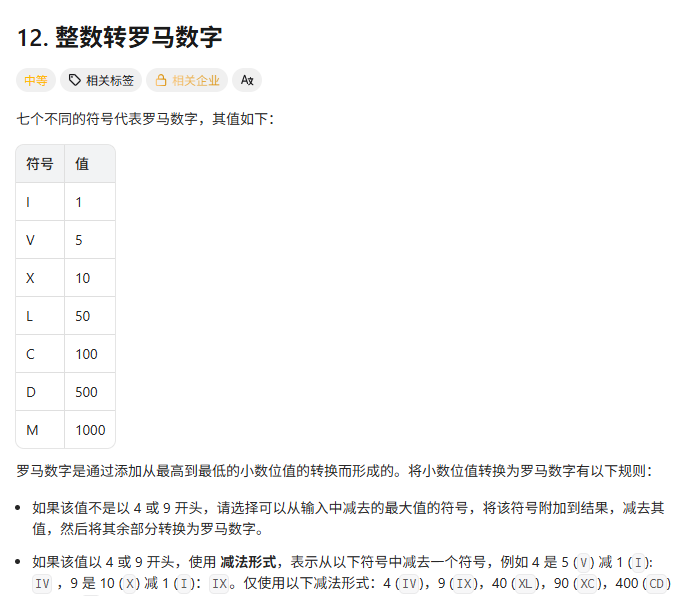  
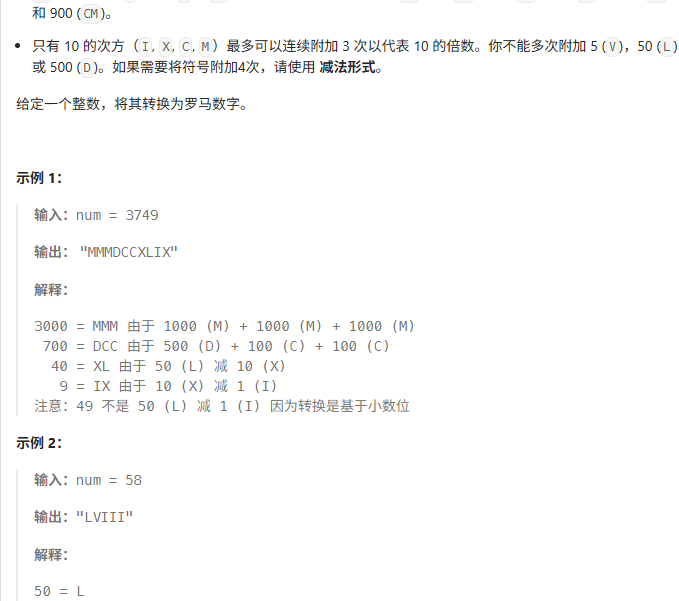  
根据罗马数字的唯一表示法，为了表示一个给定的整数 num，我们寻找不超过 num 的最大符号值，将 num 减去该符号值，然后继续寻找不超过 num 的最大符号值，将该符号拼接在上一个找到的符号之后，循环直至 num 为 0。最后得到的字符串即为 num 的罗马数字表示。  
编程时，可以建立一个数值-符号对的列表 valueSymbols，按数值从大到小排列。遍历 valueSymbols 中的每个数值-符号对，若当前数值 value 不超过 num，则从 num 中不断减去 value，直至 num 小于 value，然后遍历下一个数值-符号对。若遍历中 num 为 0 则跳出循环。

In [24]:
from typing import List
class Solution:
    """按照构造规则进行算法分析
    逐层数字位数进行构造"""
    def intToRoman(self, num:int)->str:
        if not 1<=num<=3999: return None
        normal_toman = {1: 'I',   5: 'V',   10: 'X', 50: 'L',  
                        100: 'C', 500: 'D', 1000: 'M'}
        special_toman= {4: 'VI',  9: 'XI',   40: 'LX', 
                        90: 'CX', 400: 'DC', 900: 'MC'}
        Roman = ''
        index = 0
        # 构造数字映射罗马数字算法
        while num > 0:
            reminder = num % 10
            temp = reminder
            num = num // 10
            if reminder in [4, 9]:
                reminder = reminder * 10**index
                Roman += special_toman[reminder]
            elif reminder < 5:
                reminder = reminder * 10**index
                if reminder < 10: Roman += 'I' * temp
                elif 10 <= reminder < 100: Roman += 'X' * temp
                elif 100 <= reminder < 1000: Roman += 'C' * temp
                elif reminder >= 1000: Roman += 'M' * temp
            elif reminder >= 5:
                reminder = reminder * 10**index
                if reminder < 10: Roman +=  'I' * (temp-5) +'V'
                elif 10 <= reminder < 100: Roman +=  'X' * (temp-5) +'L'
                elif 100 <= reminder < 1000: Roman += 'C' * (temp-5) +'D'
            index += 1 
        return Roman[::-1]

if __name__ == '__main__':
    s = Solution()
    print(s.intToRoman(58))
    

Second reminder:8	num:5
Second reminder:50	num:0
LVIII


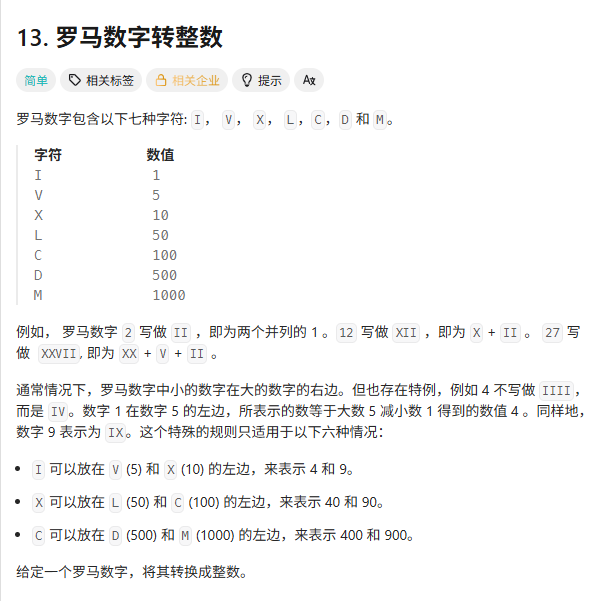

In [31]:
class Solution:
    """使用逐字母判定,排除特殊字符方式"""
    def romanToInt(self, s:str) -> int:
        if not 1<=len(s)<=15: return None
        i = 0
        roman_to_num = 0
        special_toman = {'IV':4, 'IX':9, 'XL':40, 'XC':90, 'CD':400, 'CM':900}
        normal_toman  = {'I':1, 'V':5, 'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}
        # 数字转罗马字符
        while i < len(s):
            # 判断是否为特殊字符,即4or9的形式
            if i+1<=len(s)-1 and s[i:i+2] in special_toman.keys(): 
                roman_to_num += special_toman[s[i:i+2]]
                i += 2
            else:
                roman_to_num += normal_toman[s[i]]
                i += 1
        return roman_to_num

if __name__ == '__main__':
    s = Solution()
    print(s.romanToInt("III"))

3


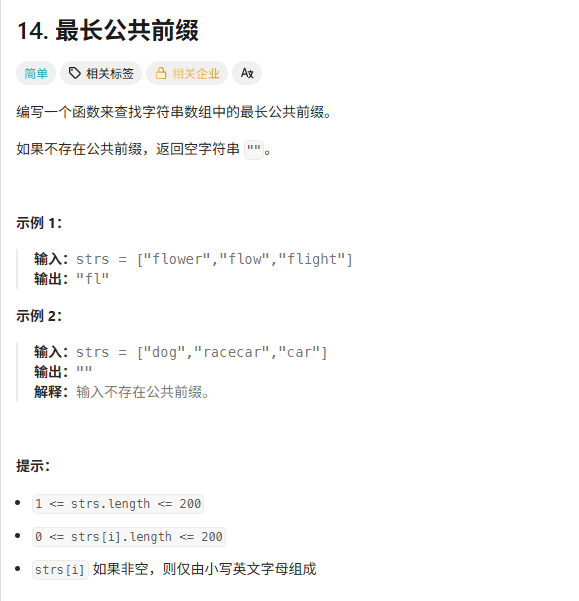

In [62]:
from typing import List
class Solution:
    def longestCommonPrefix(self,strs: List[str]) -> str:
        if not strs: return None
        # 计算最小长度字符串
        min_length = len(strs[0])
        for str in strs: min_length = min(min_length,len(str))
        public_str = ''
        # 判断公共前缀
        for i in range(min_length):
            flag = 0
            for j in range(len(strs)):
                if strs[j][i] == strs[0][i]: flag += 1
            if flag==len(strs): public_str += strs[0][i]
            else: break # 找到公共前缀后，结束循环
        return public_str
                
if __name__ == '__main__':
    strs = ["flower","flow","flight"]
    s = Solution()
    print(s.longestCommonPrefix(strs))

fl


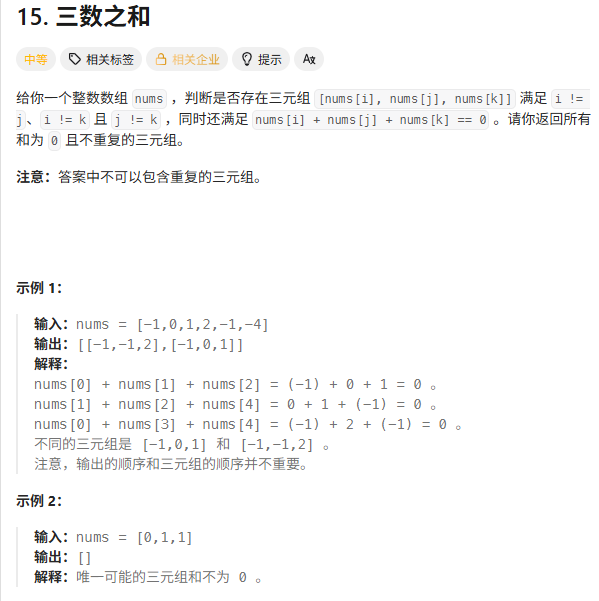  
双指针的原理是：在有序数组中，通过一个指针从左向右移动（指向较小值），另一个指针从右向左移动（指向较大值），根据三数之和与目标值的大小关系动态调整指针位置，从而高效逼近目标解，避免无效枚举。

In [11]:
from typing import List
class Solution:
    """常规思路求解组合数,时间复杂度O(n^3)"""
    def threeSum(self, nums:List[int])->List[List[int]]:
        if not nums: return []
        tripe_list = []
        # 筛选三元组
        for i in range(0, len(nums)-2):
            for j in range(i+1, len(nums)-1):
                for k in range(j+1, len(nums)):
                    if nums[i]+nums[j]+nums[k]==0: 
                        tripe_list.append([nums[i],nums[j],nums[k]])
        # 去除重复三元组
        tripe_list = list(set([tuple(sorted(tripe)) for tripe in tripe_list]))
        return tripe_list
    
class Solution:
    """双指针解法,时间复杂度O(n^2)"""
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        if not nums or len(nums) < 3: return []
        nums.sort()  # 对数组进行排序
        result = []
        for i in range(len(nums) - 2):
            if i > 0 and nums[i] == nums[i - 1]:
                continue  # 跳过重复元素
            left, right = i + 1, len(nums) - 1
            while left < right:
                total = nums[i] + nums[left] + nums[right]
                if total < 0:
                    left += 1
                elif total > 0:
                    right -= 1
                else:
                    result.append([nums[i], nums[left], nums[right]])
                    
                    while left < right and nums[left] == nums[left + 1]:
                        left += 1  # 跳过重复元素
                    while left < right and nums[right] == nums[right - 1]:
                        right -= 1  # 跳过重复元素
                    left += 1
                    right -= 1
        return result

if __name__ == '__main__':
    nums = [2,-3,0,-2,-5,-5,-4,1,2,-2,2,0,2,-4,5,5,-10]
    s = Solution() 
    print(s.threeSum(nums))

[[-10, 5, 5], [-5, 0, 5], [-4, 2, 2], [-3, -2, 5], [-3, 1, 2], [-2, 0, 2]]


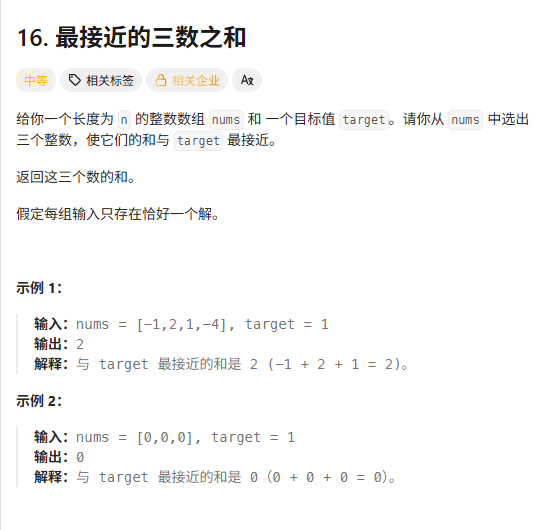  
题目要求找到与目标值 target 最接近的三元组，这里的「最接近」即为差值的绝对值最小。我们可以考虑直接使用三重循环枚举三元组，找出与目标值最接近的作为答案，时间复杂度为 O(N^3)。然而本题的 N 最大为 1000，会超出时间限制。  

In [59]:
from typing import List
inf = float('inf')
class Solution:
    """使用双指针寻找最接近目标值的三数之和
    注意双指针的条件是left+=1 if sum<target else right-=1
    并且小优化: i>1 and nums[i]==nums[i-1]排除重复元素"""
    def threeSumClosest(self, nums: List[int], target: int) -> int:
        if not nums or len(nums) <3: return None
        nums.sort()  # 对数组进行排序
        bestsum = inf
        for i in range(len(nums)):
            # 跳过重复元素
            if i>0 and nums[i]==nums[i-1]: continue
            left, right = i+1, len(nums)-1
            while left < right:
                total = nums[i]+nums[left]+nums[right]
                # 排除三数和恰好等于target的情况
                if total == target: return total
                else:
                    if total < target: left += 1
                    else: right -= 1
                    # 更接近目标值得情况
                    if abs(total-target) < abs(bestsum-target):
                        bestsum = total
        return bestsum

if __name__ == '__main__':
    nums = [-1,2,1,-4]
    target = 1
    s = Solution()
    print(s.threeSumClosest(nums,target))


2


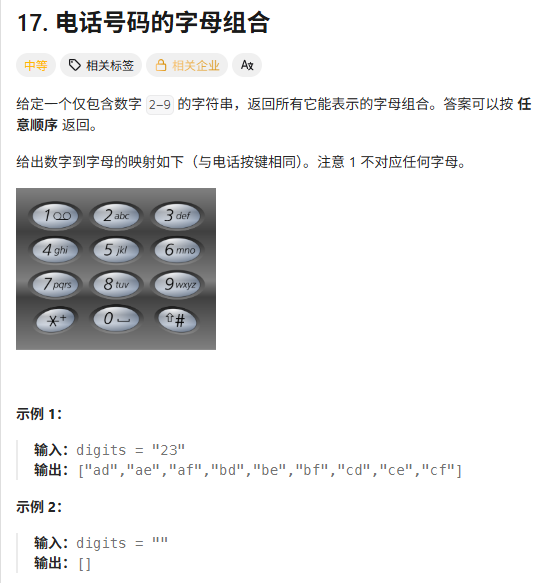

In [47]:
from typing import List
class Solution:
    """将可能出现的字母转为一个字符串
    随后使用排列组合方罗列所有可能组合"""
    def letterCombinations(self,digits: str) -> List[str]:
        if not 0<len(digits)<=4: return []
        num_to_letters = {'2':'abc', '3':'def', '4':'ghi', '5':'jkl',
                          '6':'mno', '7':'pqrs','8':'tuv', '9':'wxyz',
                          '1':'', '0':' '}
        digits = list(digits)
        # 转为基础字符串
        total_letters = ''
        for digit in digits: total_letters += num_to_letters[digit]
        total_letters = list(total_letters)
        # 获取digits长度的所有排列组合
        # 等效为任意C_n^k的排列组合求解算法
        k = len(digits)
        results = self.Combination(total_letters, k)
        # 排除数字内部的组合
        return results
    def Combination(self, digits: List[str], k: int) -> List[str]:
        """排列组合算法"""
        if k<0 and len(digits)<k: return []
        result = []
        def backtrack(start, path):
            if len(path) == k: result.append(path)
            for i in range(start, len(digits)):
                path += digits[i]
                backtrack(i+1, path)
                path = path[:-1]
        backtrack(0, '')
        return result

class Solution:
    """组合算法:求出所有可能的解法"""
    def letterCombinations(self,digits: str) -> List[str]:
        if not digits: return []
        mapping = {'2':'abc', '3':'def', '4':'ghi', '5':'jkl',
                   '6':'mno', '7':'pqrs','8':'tuv', '9':'wxyz',
                   '1':'', '0':''}
        def backtrack(index, path):
            """如果路径长度等于输入数字的长度,则找到正确的组合"""
            if index==len(digits): 
                result.append(''.join(path))
                return # 递归终止条件！！
            # 获取数字对应的字母
            current_digits = mapping[digits[index]]
            for x in current_digits:
                path.append(x)
                backtrack(index+1, path)
                path.pop()
        result = []
        backtrack(0, [])
        return result
        
if __name__ == '__main__':
    s = Solution()
    print(s.letterCombinations('23'))

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


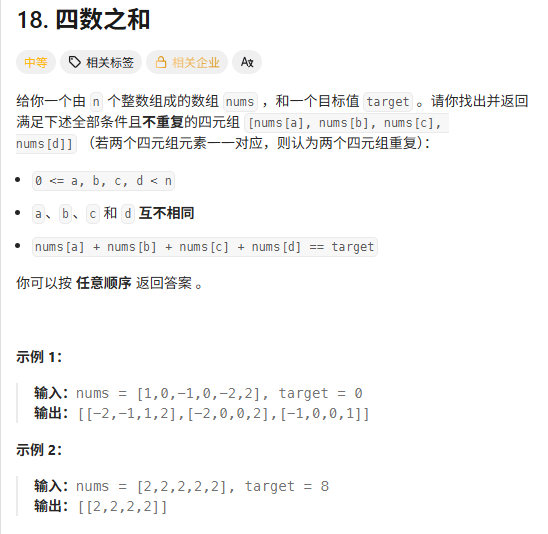  
(1).排序：nums.sort() 确保数组有序，便于使用双指针方法。  
(2).去重逻辑：在外层循环中，如果当前元素与前一个元素相同，则跳过。在内层循环中，同样处理去重。在找到一个满足条件的四元组后，继续移动左右指针并跳过相同的元素。  
(3).边界条件：确保 left 和 right 指针不会越界，并且在找到符合条件的四元组后正确更新指针位置。  

In [39]:
from typing import List
class Solution:
    def fourSum(self, nums: List[int], target:int) -> List[List[int]]:
        if not nums or len(nums)<4: return []
        nums.sort()
        total_sum = []
        # 双指针遍历排序数组
        for i in range(len(nums)-3):
            # 去除重复的元素
            if i>0 and nums[i]==nums[i-1]: continue
            for j in range(i+1, len(nums)-2):
                if j>i+1 and nums[j]==nums[j-1]: continue
                # 有效保证边界条件right=len(nums)-1
                left, right = j+1, len(nums)-1
                # 双指针搜索四数和
                while left<right:
                    total = nums[i]+nums[j]+nums[left]+nums[right]
                    if total < target: left+=1
                    elif total > target: right-=1
                    else:
                        total_sum.append([nums[i], nums[j], nums[left], nums[right]])
                        # 跳过重复元素,注意left和right索引
                        while left<right and nums[left]==nums[left+1]: left += 1
                        while left<right and nums[right]==nums[right-1]: right -=1
                        left += 1
                        right -= 1
        return total_sum

if __name__ == '__main__':
    s = Solution()
    print(s.fourSum([1, 0, -1, 0, -2, 2], 0))

[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]


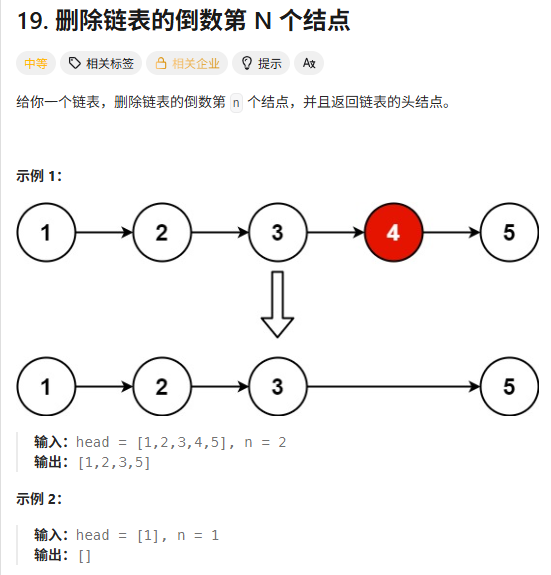  
使用双指针法，快指针先走 n 步，然后快慢指针同时移动直到快指针到达末尾，此时慢指针的下一个节点即为要删除的节点。这个方法通过引入虚拟头结点简化了边界条件处理，并利用双指针技巧高效地找到了需要删除的节点。  
想象有一把长度固定的尺子，左端点在链表头部，右端点在正数第 n 个节点。向右移动尺子，当尺子右端点到达链表末尾时，左端点就在倒数第 n 个节点。由于需要删除节点，我们需要找倒数第 n 个节点的前一个节点（倒数第 n+1 个节点），这样才能做删除操作。

In [38]:
from typing import List,Optional
class Solution:
    """使用双指针解法：快慢指针"""
    def removeNthFromEnd(self, head: Optional[ListNode],
                         n: int) -> Optional[ListNode]:
        # 可能会删除链表头部,使用哨兵节点
        dummy = ListNode(0)
        dummy.next = head
        left = right = dummy
        # 快/右指针先走n步
        for _ in range(n): right = right.next
        # 类似尺子,左右指针一起走直到尾节点
        while right.next:
            left = left.next
            right = right.next
        # 删除第n个节点元素
        left.next = left.next.next
        return dummy.next
    
class ListNode:
    """初始化链表节点"""
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    """使用双指针解法：快慢指针"""
    def removeNthFromEnd(self, head: Optional[ListNode],
                         n: int) -> Optional[ListNode]:
        # 列表转为链表
        head = self.list_to_linkedlist(head)
        # 可能会删除链表头部,使用哨兵节点
        dummy = ListNode(0)
        dummy.next = head
        left = right = dummy
        # 快/右指针先走n步
        for _ in range(n): right = right.next
        # 类似尺子,左右指针一起走直到尾节点
        while right.next:
            left = left.next
            right = right.next
        # 删除第n个节点元素
        left.next = left.next.next
        return self.linkedlist_to_list(dummy.next)
    def list_to_linkedlist(self, lst: List[int]) -> Optional[ListNode]:
        """辅助函数：将列表转换为链表"""
        if not lst: return None
        head = ListNode(lst[0])
        current = head
        for val in lst[1:]:
            current.next = ListNode(val)
            current = current.next
        return head
    def linkedlist_to_list(self, head: Optional[ListNode]) -> List[int]:
        """辅助函数：将链表转换为列表，用于打印结果"""
        result = []
        while head:
            result.append(head.val)
            head = head.next
        return result

if __name__ == '__main__':
    s = Solution()
    print(s.removeNthFromEnd(head = [1,2,3,4,5], n = 2))

[1, 2, 3, 5]


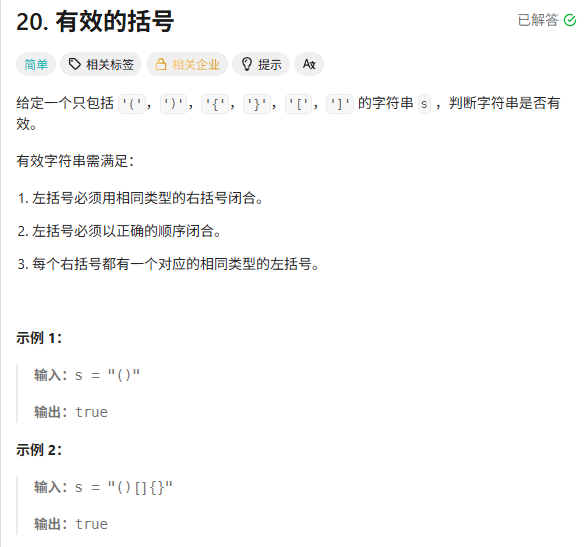  
 利用栈的“后进先出”特性，遇到左括号入栈，遇到右括号时检查栈顶是否为对应的左括号，是则出栈，否则不匹配；最终栈为空则说明所有括号正确闭合。

In [84]:
class Solution:
    """使用栈-先进后出原则,判断括号是否匹配"""
    def isValid(self, s:str) -> bool:
        if not s or len(s) < 2: return False
        stack = []
        mapping = {')':'(', '}':'{', ']':'['}
        for c in s :
            if c in ['(', '[', '{']: stack.append(c)
            else:
                # 栈顶元素与其相等则抛出栈顶元素
                if stack and stack[-1] == mapping[c]: stack.pop()
                else: return False
        if len(stack)==0: return True
        else: return False

if __name__ == '__main__':
    s = Solution()
    print(s.isValid("()")) 

True


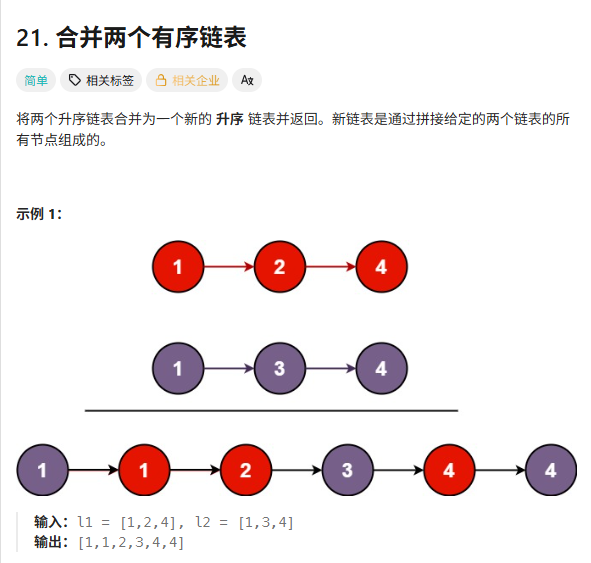

In [95]:
from typing import Optional, List
class ListNode:
    def __init__(self,val=0, next=None):
       self.val = val
       self.next = next
class Solution:
    def mergeTwoLists(self, list1: Optional[ListNode], 
            list2: Optional[ListNode]) -> Optional[ListNode]:
        # 初始虚拟链表头,并转为链表
        head = ListNode(0)
        up_sort = head
        list1 = self.list_to_linkedlist(list1)
        list2 = self.list_to_linkedlist(list2)
        # 升序重组链表
        while list1 and list2:
            if list1.val < list2.val:
                up_sort.next = list1
                list1 = list1.next
            else:
                up_sort.next = list2
                list2 = list2.next
            up_sort = up_sort.next
        # 拼接剩余链表
        up_sort.next = list1 or list2
        return self.linkedlist_to_list(head.next)
    def list_to_linkedlist(self, lst: List[int])-> Optional[ListNode]:
        """辅助函数：列表转链表"""
        if not lst: return None
        head = ListNode(lst[0])
        current = head
        for val in lst[1:]:
            current.next = ListNode(val)
            current = current.next
        return head
    def linkedlist_to_list(self, head: Optional[ListNode])-> List[int]:
        """辅助函数：链表转列表"""
        result = []
        while head:
            result.append(head.val)
            head = head.next
        return result
    
if __name__ == '__main__':
    s = Solution()
    l1 = [1,2,4]
    l2 = [1,3,4]
    print(s.mergeTwoLists(l1, l2))

[1, 1, 2, 3, 4, 4]


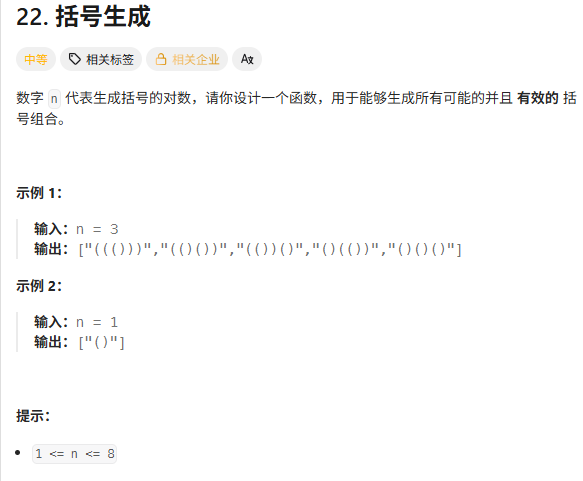  
此解法采用回溯算法生成所有合法的n对括号组合。在递归过程中通过维护当前路径中左括号和右括号的数量，并依据以下原则进行剪枝：左括号数量不超过n；右括号数量不超过左括号数量。这确保了只生成有效的括号序列。时间复杂度: $O\left(\frac{4^n}{\sqrt{n}}\right)$;空间复杂度: $O\left(\frac{4^n}{\sqrt{n}}\right) + O(n)$，其中前者是由于存储所有结果所需的空间（考虑到卡特兰数目的增长），后者为递归调用栈的最大深度。

In [109]:
from typing import List
class Solution:
    """回溯法: 分成左右n的树形来求解"""
    def generateParenthesis(self, n:int) -> List[str]:
        if n<=0: return []
        results = []
        def backtrack(path, left, right):
            if len(path)==2*n:
                results.append(path)
                return
            if left < n:
                backtrack(path+'(', left+1, right)
            if right < left:
                backtrack(path+')', left, right+1)
        backtrack('', 0, 0)
        return results 
    
if __name__ == '__main__':
    s = Solution()
    print(s.generateParenthesis(3))

['((()))', '(()())', '(())()', '()(())', '()()()']


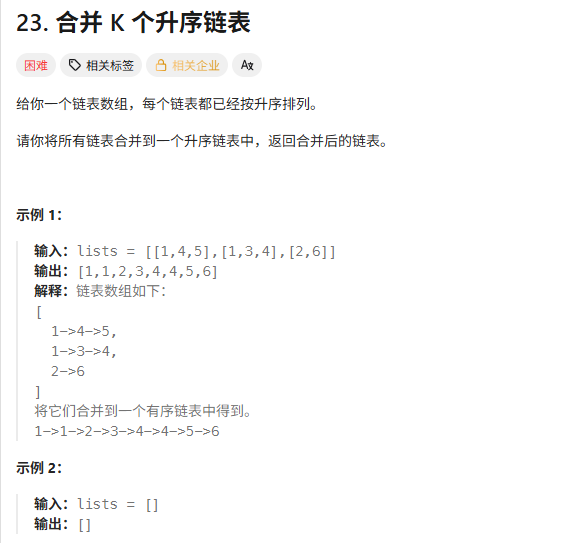  
1.最小堆实现：初始把所有链表的头节点入堆，然后不断弹出堆中最小节点 x，如果 x.next 不为空就加入堆中。循环直到堆为空。把弹出的节点按顺序拼接起来，就得到了答案。  
2.分治实现：把 lists 一分为二（尽量均分），先合并前一半的链表，再合并后一半的链表，然后把这两个链表合并成最终的链表。如何合并前一半的链表呢？我们可以继续一分为二。如此分下去直到只有一个链表，此时无需合并。

In [161]:
from typing import List, Optional 
from heapq import heapify, heappop, heappush
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next =next
ListNode.__lt__ = lambda a,b: a.val < b.val
class Solution:
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        if not lists: return None
        cur = head = ListNode()
        h = [node for node in lists if node]
        # 将链表头原地堆化，保证每次取最小值
        heapify(h)
        while h:
            # 弹出最小节点
            node = heappop(h) 
            if node.next: heappush(h, node.next)
            cur.next  = node
            cur = cur.next
        return head.next

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next =next
class Solution:
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        if not lists: return None
        # 全部转为链表
        m = len(lists)
        if m == 0 : return None
        step = 1
        # 直接自底向上合并链表-两两合并
        while step < m:
            for i in range(0, m-step, step*2):
                lists[i] = self.mergeTwoLists(lists[i], lists[i+step])
            step *= 2
        return self.linkedlist_to_list(lists[0])
    def mergeTwoLists(self, lists1:Optional[ListNode], lists2:Optional[ListNode]) -> Optional[ListNode]:
        """分治思想融合两升序链表"""
        head = ListNode()
        current_node = head
        while lists1 and lists2:
            if lists1.val < lists2.val:
                current_node.next = lists1
                lists1 = lists1.next
            else:
                current_node.next = lists2
                lists2 = lists2.next
            current_node = current_node.next
        current_node.next = lists1 or lists2
        return head.next
    def list_to_linkedlist(self, lst: List[int]) -> Optional[ListNode]:
        """辅助函数: 列表转为链表"""
        if not lst: return None
        head = ListNode(lst[0])
        cur = head
        for val in lst[1:]:
            cur.next = ListNode(val)
            cur = cur.next
        return head
    def linkedlist_to_list(self, head: Optional[ListNode]) -> List[int]:
        """辅助函数: 链表转为列表"""
        results = []
        while head:
            results.append(head.val)
            head = head.next
        return results
    
if __name__ == '__main__':
    s = Solution()
    l1 = [1,4,5]
    l2 = [1,3,4,]
    l3 = [2,6]
    lists = [l1, l2, l3]
    list_linked = [s.list_to_linkedlist(node) for node in lists]
    print(s.mergeKLists(list_linked))

[1, 1, 2, 3, 4, 4, 5, 6]


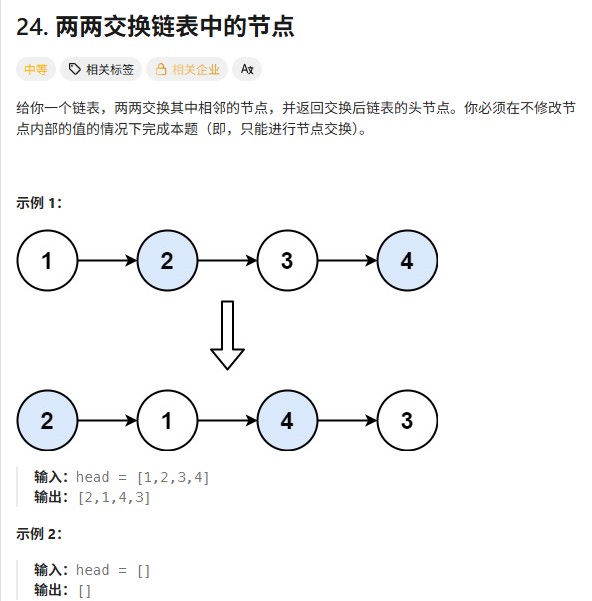  
如果链表中至少有两个节点，则在两两交换链表中的节点之后，原始链表的头节点变成新的链表的第二个节点，原始链表的第二个节点变成新的链表的头节点。链表中的其余节点的两两交换可以递归地实现。在对链表中的其余节点递归地两两交换之后，更新节点之间的指针关系，即可完成整个链表的两两交换。

In [175]:
from typing import Optional, List
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def swapPairs(self, head: Optional[ListNode]) -> Optional[ListNode]:
        dummy = ListNode(0)
        dummy.next = head
        cur = dummy
        while dummy.next and dummy.next.next:
            # 初始化两节点
            node1 = dummy.next
            node2 = dummy.next.next
            # 交换节点
            dummy.next = node2
            node1.next = node2.next
            node2.next = node1
            # 移动指针
            dummy = node1
        return cur.next
    def list_to_linkedlist(self, lst: List[int]) -> Optional[ListNode]:
        """辅助函数: 将列表转为链表"""
        dummy = ListNode(lst[0])
        cur = dummy
        for val in lst[1:]:
            cur.next = ListNode(val)
            cur = cur.next
        return dummy.next
    def linkedlist_to_list(self, head: Optional[ListNode]) -> List[int]:
        """辅助函数: 将链表转为列表"""
        lst = []
        while head:
            lst.append(head.val)
            head = head.next
        return lst

if __name__ == '__main__':
    s = Solution()
    head = s.list_to_linkedlist([1, 2, 3, 4, 5])
    print(s.linkedlist_to_list(s.swapPairs(head)))


[3, 2, 5, 4]


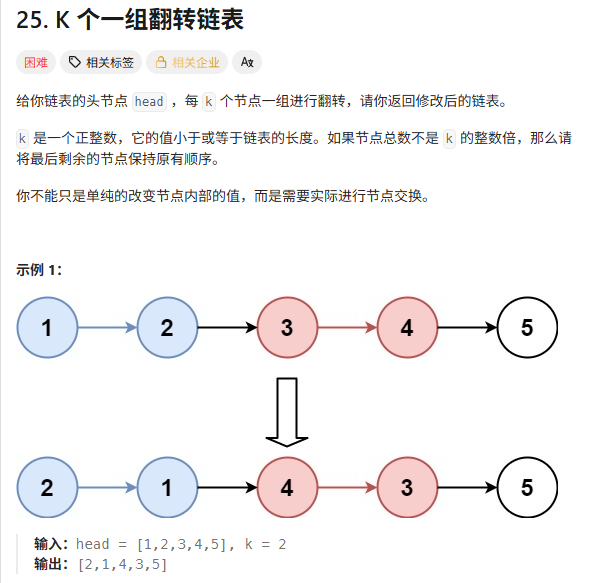  
我们需要把链表节点按照 k 个一组分组，所以可以使用一个指针 head 依次指向每组的头节点。这个指针每次向前移动 k 步，直至链表结尾。对于每个分组，我们先判断它的长度是否大于等于 k。若是，我们就翻转这部分链表，否则不需要翻转。

In [199]:
from typing import List, Optional
class ListNode:
    def __init__(self,val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        # 计算链表长度
        length = 0
        current = head
        while current: length += 1; current = current.next
        # 如果链表长度小于k，直接返回原链表
        if length < k: #设置的递归出口
            return head
        # 反转前k个节点
        prev = None
        current = head #重新设置指针位置
        for _ in range(k):
            next_node = current.next
            current.next = prev
            prev = current
            current = next_node
        # 递归反转后续链表
        head.next = self.reverseKGroup(current, k)
        return prev
    def list_to_linkedlist(self, lst: List[int]) -> Optional[ListNode]:
        if not lst:
            return None
        head = ListNode(lst[0])
        cur = head
        for val in lst[1:]:
            cur.next = ListNode(val)
            cur = cur.next
        return head
    def linkedlist_to_list(self, head: Optional[ListNode]) -> List[int]:
        lst = []
        while head:
            lst.append(head.val)
            head = head.next
        return lst

if __name__ == '__main__':
    s = Solution()
    head = s.list_to_linkedlist([1, 2, 3, 4, 5, 6, 7, 8 ,9])
    print(s.linkedlist_to_list(s.reverseKGroup(head, 4)))  # 输出应为 [2, 1, 4, 3, 5]

[4, 3, 2, 1, 8, 7, 6, 5, 9]


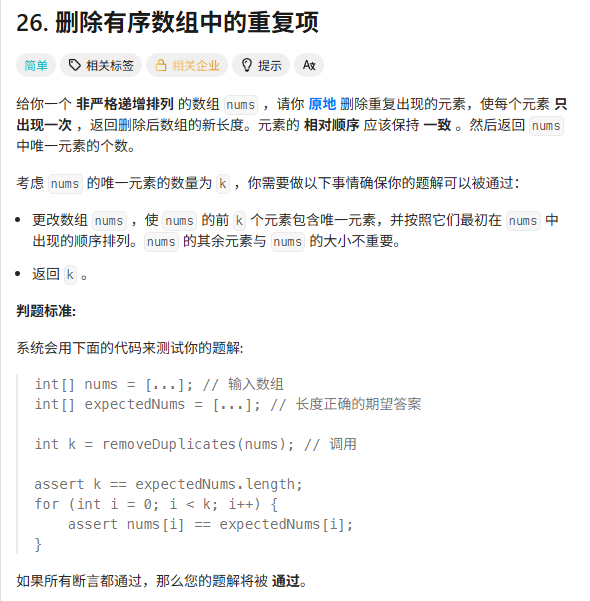

In [213]:
from typing import List
class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        if not nums: return nums
        # 使用双指针清除重复元素
        slow = 0
        for fast in range(1, len(nums)):
            # 如果快慢指针不相等,则将快指针对应元素前置
            if nums[fast] != nums[slow]:
                slow += 1
                nums[slow] = nums[fast]
        print(nums)
        return slow + 1
    
if __name__ == '__main__':
    s = Solution()
    print(s.removeDuplicates([1,1,2]))

[1, 2, 2]
2


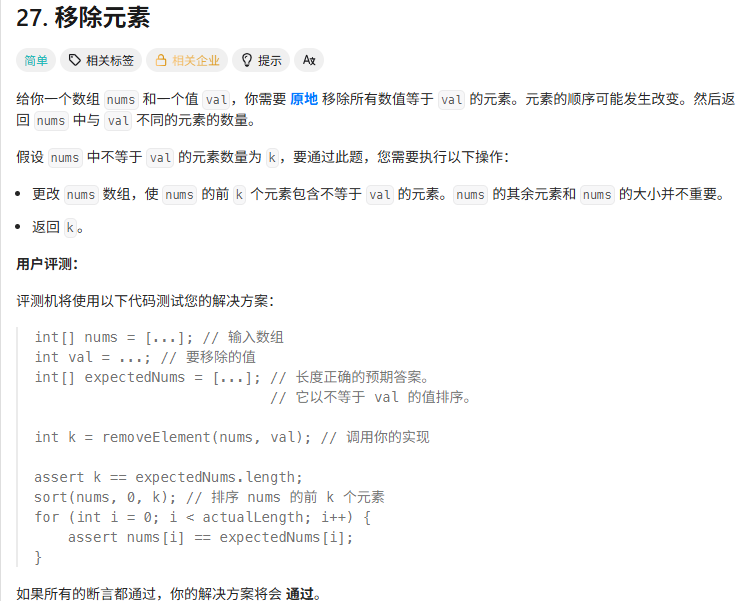

In [226]:
class Solution:
    """使用双指针移除元素"""
    def removeElement(self, nums: List[int], val: int) -> int:
        # if not nums: return None
        left = 0
        # 双指针遍历
        for right in range(len(nums)):
            if nums[right] != val:
                nums[left] = nums[right]
                left += 1
        return left, nums

if __name__ == "__main__":
    s = Solution()
    print(s.removeElement([0,1,2,2,3,0,4,2], 2))

(5, [0, 1, 3, 0, 4, 0, 4, 2])


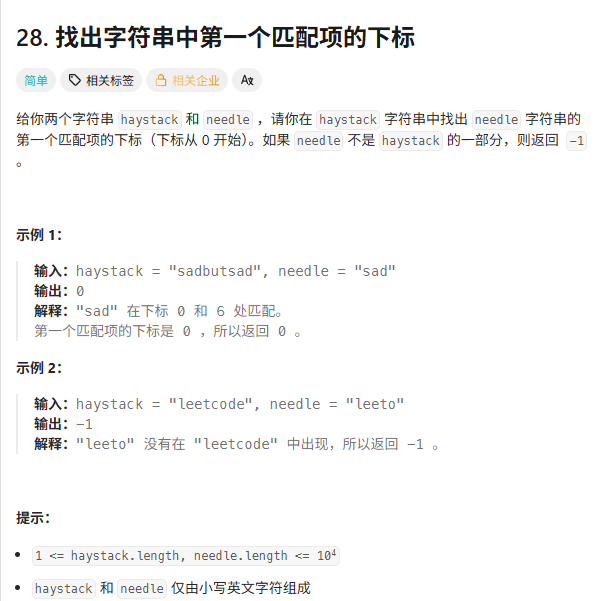

In [252]:
class Solution:
    """滑动窗口法: 移动固定长度的needle长度"""
    def strStr(self, haystack: str, needle: str) -> int:
        if not haystack or not needle: return -1
        length = len(needle)
        for i in range(len(haystack)-length+1):
            if haystack[i:i+length]==needle: return i
        return -1

if __name__ == "__main__":
    s = Solution()
    print(s.strStr("a", "a"))

0


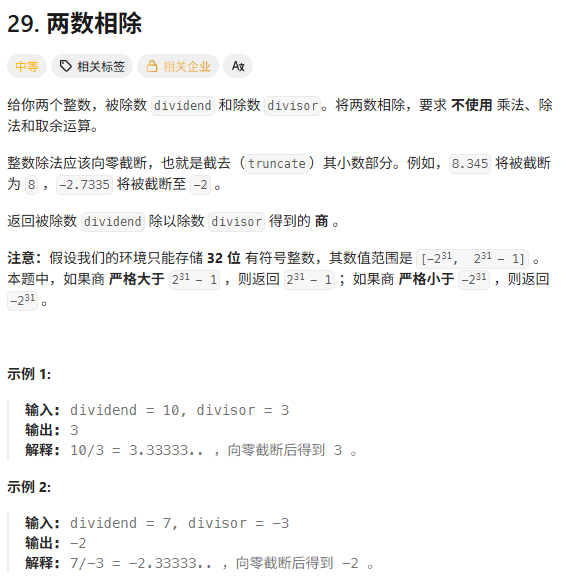

In [311]:
class Solution:
    """迭代法：使用被除数或者除数进行除法运算
    思路: 使用连续的减法操作直到小于零为止"""
    def divide(self, dividend: int, divisor: int) -> int:
        if divisor == 0: return None
        # 判断商的符号
        if dividend<0 and divisor>0 or\
            dividend>0 and divisor<0: prefix = -1
        else: prefix = 1
        if divisor ==1: return dividend
        if divisor == -1: return -dividend
        dividend, divisor = abs(dividend), abs(divisor)
        count = 0
        # 迭代减法进行求解
        while dividend>=divisor:
            dividend -= divisor
            count += 1
        # 获取商
        if prefix>0: return min(count*prefix, 2**31-1)
        else: return max(count*prefix, -2**31)

class Solution:
    """移位法: d - r*2^i"""
    def divide(self, dividend:int, divisor:int)->int:
        if divisor==0:return None
        if divisor==1: return max(min(dividend, 2**31-1), -2**31)
        if divisor==-1: return max(min(-dividend, 2**31-1), -2**31)
        # 获取商的符号
        sign = 1 if (dividend>0)^(divisor>0) else -1
        dividend, divisor = abs(dividend), abs(divisor)
        # 使用移位减法
        result, temp = 0, 0 
        while dividend >= divisor:
            temp, multiple = divisor, 1
            # 找到不超过dividend的divisor*2^i
            while dividend>=(temp<<1):
                temp<<=1
                multiple <<= 1
            dividend -= temp
            result += multiple
        result = -result if sign<0 else result
        return max(min(result, 2**31-1), -2**31)
 
if __name__ == '__main__':
    s = Solution()
    print(s.divide(555, 5))

-111


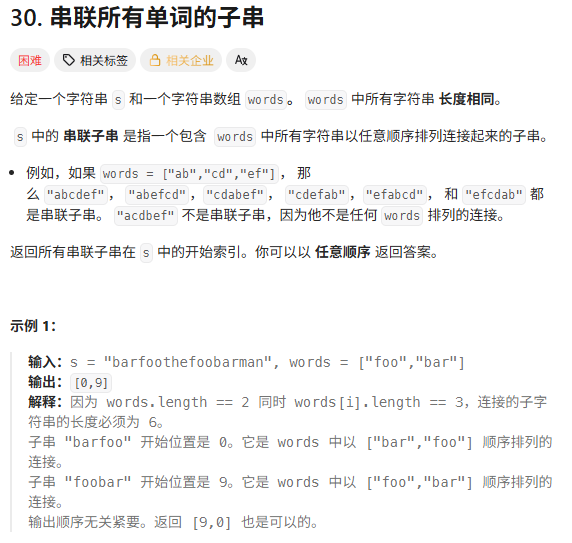

In [35]:
from typing import List
from collections import Counter
class Solution:
    """滑动窗口法+统计词频"""
    def findSubstring(self, s:str, words:List[str])->List[int]:
        if not s or not words: return []
        words_len = len(''.join(words))
        word_len = len(words[0])
        # 将words去重
        words = list(set(words))
        # 判断子串是否包含所有单词
        def check(ls: str, word_len:int):
            # 字串转化为单词组->去重
            ls_words = [ls[i:i+word_len] for i in range(0, len(ls), word_len)]
            if len(set(ls_words))!=len(words): return False
            for w in ls_words:
                if w not in words: return False
            return True
        results = []
        for i in range(len(s)-words_len+1):
            if check(s[i:i+words_len], word_len): results.append(i)
        return results
class Solution:
    def findSubstring(self, s: str, words: List[str]) -> List[int]:
        if not s or not words: return []
        # 统计单词组长度
        word_len = len(words[0])
        words_len = len(words) * word_len
        word_count = Counter(words)
        results = []
        # 遍历字符串,按照次数、长度来检测
        for i in range(len(s) - words_len + 1):
            sub_str = s[i:i + words_len]
            sub_words = [sub_str[j:j + word_len] for j in range(0, words_len, word_len)]
            # 比较两个字符串的词频是否相同、顺序重要
            sub_word_count = Counter(sub_words)
            if sub_word_count == word_count: results.append(i)
        return results

if __name__ == '__main__':
    
    s = Solution()
    print(s.findSubstring("wordgoodgoodgoodbestword", ["word","good","best","good"]))

[8]


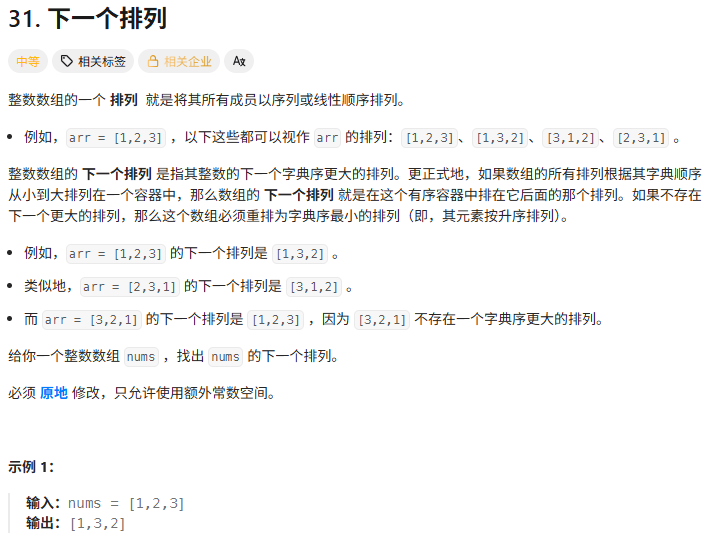

In [37]:
from typing import List
class Solution:
    def nextPermutation(self, nums: List[int]) -> None:
        """修改nums使其变为下一个字典序更大的排列
        如果没有下一个更大的排列，则将数组重排为字典序最小的排列(即升序)
        必须原地修改数组，不使用额外的空间"""
        n = len(nums)
        i = n - 2
        # 从右到左找到第一个递减的元素
        while i >= 0 and nums[i] >= nums[i + 1]: i -= 1
        # 如果找到了这样一个元素,在其右侧找到比nums[i]大的最小元素
        if i >= 0:
            j = n - 1
            while nums[j] <= nums[i]: j -= 1
            # 交换找到的元素
            nums[i], nums[j] = nums[j], nums[i]
        # 反转位置i之后的序列
        left, right = i + 1, n - 1
        while left < right:
            nums[left], nums[right] = nums[right], nums[left]
            left, right = left + 1, right - 1

if __name__ == '__main__':
    s = Solution()
    print(s.nextPermutation([1,2,3]))

None


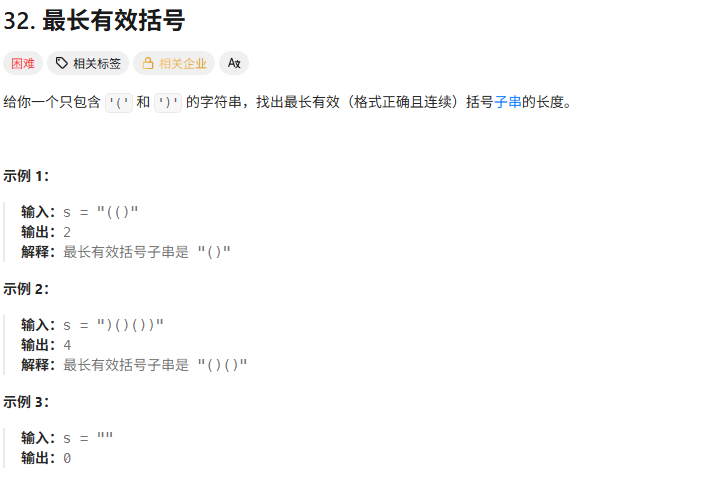  
遍历字符串中的每个字符 c 和其索引 i。如果 c 是左括号 (，则将其索引 i 压入栈中。如果 c 是右括号 )，则弹出栈顶元素（即最近的一个左括号的位置）。如果此时栈为空，说明当前右括号没有匹配的左括号，将当前索引 i 压入栈中作为新的基准位置。如果栈不为空，则计算当前有效括号子串的长度 i - stack[-1]，并更新最大长度 max_len。

In [108]:
class Solution:
    """使用双指针法寻找最有效的括号组"""
    def longestValidParentheses(self, s: str) -> int: 
        if not s: return 0
        stack = [-1] # 最关键步骤:初始化基准位置
        max_len = 0
        for i,c in enumerate(s):
            if c == '(': stack.append(i)
            else:
                stack.pop()
                if not stack: stack.append(i)
                else: max_len = max(max_len, i-stack[-1])
        return max_len

if __name__ == '__main__':
    s = Solution()
    print(s.longestValidParentheses(")(()()()"))

6


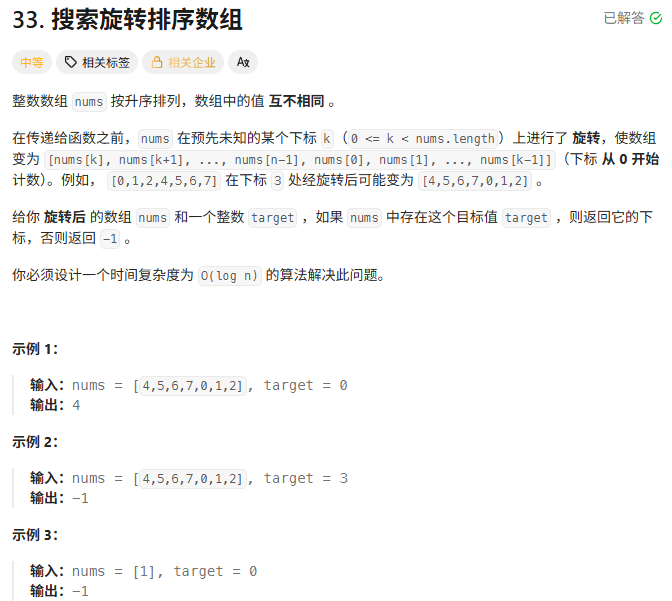  
二分查找针对升序或者降序数组，我们需要设计一个时间复杂度为 $O(log n)$ 的算法来搜索旋转排序数组中的目标值。这是一个经典的二分查找问题的变种，因为数组是部分有序的。目前算法思路：确定旋转点：首先需要找到数组的旋转点，即最小元素的位置。这个位置将帮助我们决定在哪个子数组中进行二分查找。二分查找：根据旋转点，我们可以将数组分为两个有序的部分，并在这两个部分中分别进行二分查找。

In [12]:
from typing import List
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        if not nums: return -1
        # 修改二分查找排序算法
        left, right = 0, len(nums)-1
        while left<=right:
            # 二分找到中间值mid
            mid = (left+right)//2
            if nums[mid] == target: return mid
            # 判断左边是否有序
            if nums[left] <=nums[mid]:
                if nums[left]<=target<nums[mid]: right = mid-1
                else: left = mid+1
            # 判断右半部分有序
            else:
                if nums[mid]<target<=nums[right]: left=mid+1
                else: right = mid-1
        return -1

if __name__ == "__main__":
    s = Solution()
    print(s.search([4,5,6,7,0,1,2], 0))

4


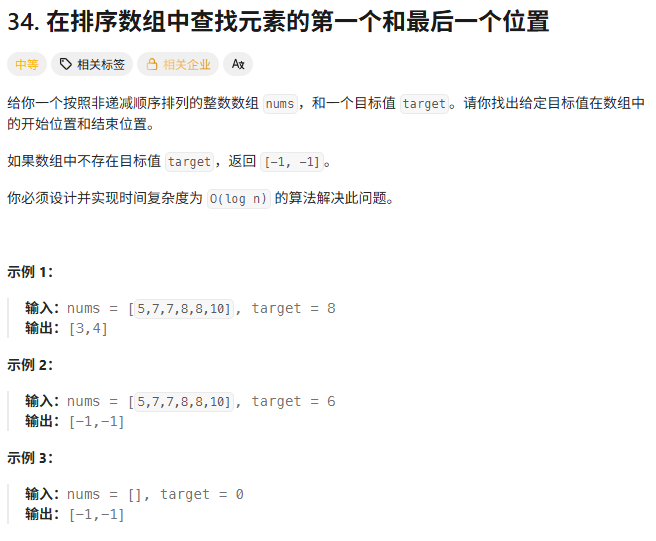

In [45]:
from typing import List
class Solution:
    """二分查找: 同样使用二分查找, 找到目标值左右的边界"""
    def searchRange(self, nums: List[int], target: int) -> List[int]:
        if not nums: return [-1, -1]
        left, right = 0, len(nums)-1
        left_index, right_index = -1, -1
        # 二分查找变种
        while left <= right:
            mid = (left+right)//2
            if nums[mid]==target:
                left, right= mid, mid
                while left-1>=0 and nums[left-1]==target: left-=1
                while right+1<=len(nums)-1 and nums[right+1]==target: right+=1
                return [left, right]
            # 判断左端点是否小于目标值
            if nums[mid]<=target: 
                if nums[left]<=target<=nums[right]: 
                    if nums[left]==target: left_index = left
                    left = mid+1
                else: right = mid-1
            # 判断右端点是否大于目标值
            else:
                if nums[left]<=target<=nums[right]: 
                    if nums[right]==target: right_index = right
                    right = mid-1
                else: left = mid+1
        return [left_index, right_index]

if __name__ == '__main__':
    s = Solution()
    print(s.searchRange([5,7,7,8,8,10], 8))

[3, 4]


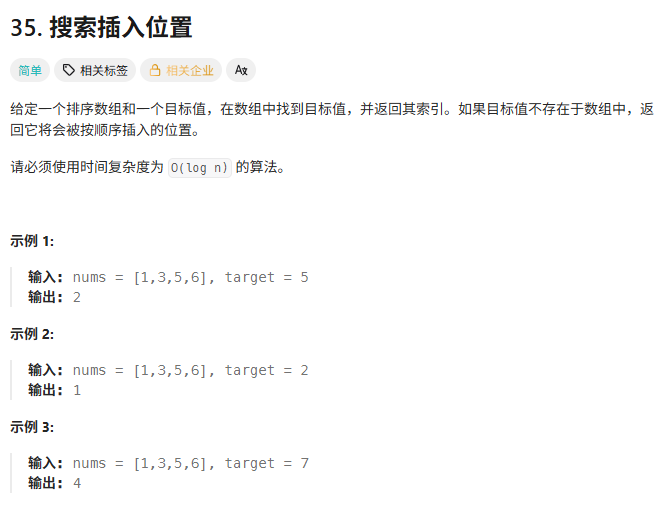

In [ ]:
from typing import List
class Solution:
    """使用二分查找搜索可能的顺序"""
    def searchInsert(self, nums: List[int], target: int) -> int:
        left, right = 0, len(nums)-1
        while left<=right:
            mid = (left+right)//2
            if nums[mid]==target: return mid
            elif nums[mid]<target: left=mid+1
            else: right=mid-1
        return left

if __name__ == '__main__':
    s = Solution()
    print(s.searchInsert([1,3,5,6], 6))

0 3
2 3
3 3
(4, 3)


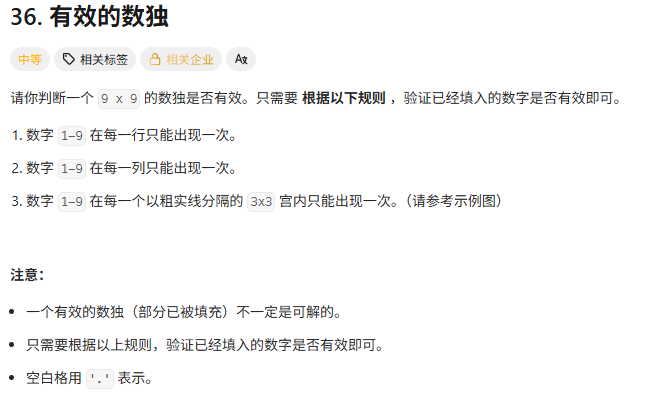  
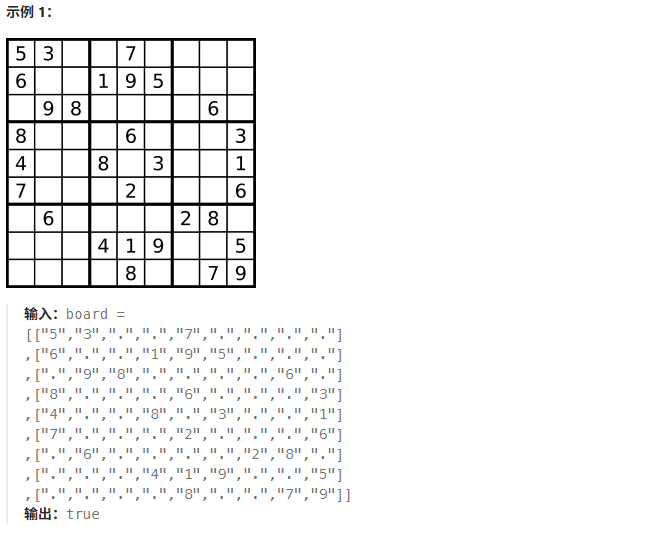  

In [33]:
from typing import List
class Solution:
    def isValidSudoku(self, board: List[List[str]])->bool:
        if not board: return None
        # 使用集合来统计出现的词频
        rows = [set() for _ in range(9)]
        cols = [set() for _ in range(9)]
        boxes = [set() for _ in range(9)]
        for i in range(9):
            for j in range(9):
                # 忽略重复元素
                if board[i][j] == '.':continue
                # 计算当前的单元格
                box_index = (i//3)*3 + j//3
                if board[i][j] in rows[i] or board[i][j] in cols[j] or\
                board[i][j] in boxes[box_index]: return False
                rows[i].add(board[i][j])
                cols[j].add(board[i][j])
                boxes[box_index].add(board[i][j])
        return True

if __name__ == '__main__':
    s = Solution()
    print(s.isValidSudoku([
        ["5","3",".",".","7",".",".",".","."],
        ["6",".",".","1","9","5",".",".","."],
        [".","9","8",".",".",".",".","6","."],
        ["8",".",".",".","6",".",".",".","3"],
        ["4",".",".","8",".","3",".",".","1"],
        ["7",".",".",".","2",".",".",".","6"],
        [".","6",".",".",".",".","2","8","."],
        [".",".",".","4","1","9",".",".","5"],
        [".",".",".",".","8",".",".","7","9"]]))

(True, [{'7', '5', '3'}, {'9', '6', '5', '1'}, {'9', '6', '8'}, {'3', '6', '8'}, {'4', '3', '8', '1'}, {'2', '7', '6'}, {'2', '6', '8'}, {'9', '4', '5', '1'}, {'9', '7', '8'}])


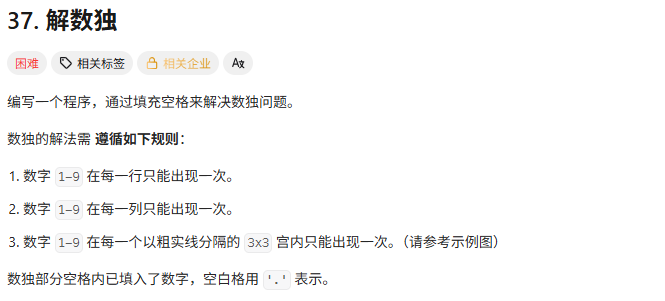 
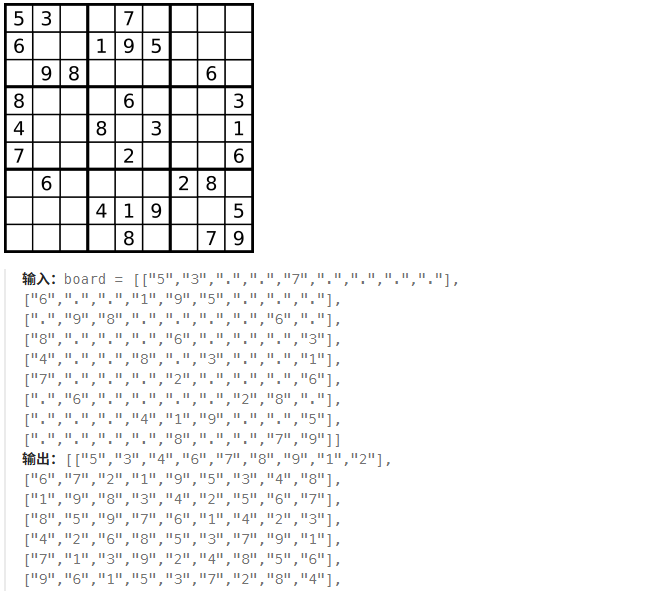  
回溯算法思想来解决数独问题，其核心是通过递归尝试在空格中填入1-9的数字，并在每一步验证填入的数字是否满足数独规则（即行、列、3×3宫格内无重复数字）。若某一步无法找到合法数字，则回溯至上一状态重新尝试。实现步骤如下：从左到右、从上到下遍历棋盘，找到第一个空格（'.'）；尝试将字符 '1' 到 '9' 填入该位置；使用 isValid函数检查填入后是否合法（检查所在行、列和3×3子块是否有重复）；若合法，则递归调用 backtracking 继续填下一个空格； 若递归返回 true，说明已找到解，直接返回；否则回溯（恢复为 '.'），尝试下一个数字；所有数字都不合法时返回false，触发上层回溯； 当所有格子都被填满且合法时，返回 true，求解完成。时间复杂度：最坏情况下每个空格都要尝试1-9，假设空格数为 $ n $，则时间复杂度为 $ O(9^n) $。虽然指数级较高，但由于数独约束强，实际运行中剪枝效果显著，性能可接受。空间复杂度：递归深度最多为棋盘中空格的数量，即 $ O(n) $，其中 $ n \leq 81 $，主要用于递归调用栈。额外使用的空间仅为常量级别的变量，不随输入规模增长。

In [17]:
from typing import List
class Solution:
    """使用回溯算法进行求解,通过不断更新检索可能出现的情况，
    直到找到所有可能的解"""
    def solveSudoku(self, board: List[List[str]]) -> None:
        if not board: return None
        def backtrack(path):
            for i in range(9):
                for j in range(9):
                    # 去掉重复元素
                    if path[i][j]!='.':continue
                    # 尝试填充所有的数字
                    for num in range(1,10):
                        if self.isValid(i, j, str(num), path):
                            path[i][j] = str(num)
                            if backtrack(path): return True
                        # 恢复现场,撤销失败
                        path[i][j] = '.'
                    return False
            return True
        # 对算法进行回溯
        return backtrack(board), board
    def isValid(self, i:int, j:int, char:str, path:List[List[str]])->bool:
        # 先填充字符
        path[i][j] = char
        # 判断数组条件是否合法
        rows = [set() for _ in range(9)]
        cols = [set() for _ in range(9)]
        boxes = [set() for _ in range(9)]
        for i in range(9):
            for j in range(9):
                cell = path[i][j]
                if cell == '.': continue
                # 计算boxes的索引->其实需要计算不同检测项的索引
                box_index = (i//3)*3 + j//3
                if cell in rows[i] or cell in cols[j] \
                or cell in boxes[box_index]: return False
                # 添加到boxes
                rows[i].add(cell)
                cols[j].add(cell)
                boxes[box_index].add(cell)
        return True

# class Solution:
#     def solveSudoku(self, board: List[List[str]]) -> None:
#         # 初始化行、列、宫的已用数字记录
#         rows = [set() for _ in range(9)]  # rows[i] 表示第 i 行已用的数字
#         cols = [set() for _ in range(9)]  # cols[j] 表示第 j 列已用的数字
#         boxes = [set() for _ in range(9)]  # boxes[b] 表示第 b 个宫已用的数字
#         # 先扫描整个 board，填充 rows, cols, boxes
#         for i in range(9):
#             for j in range(9):
#                 cell = board[i][j]
#                 if cell != '.':
#                     rows[i].add(cell)
#                     cols[j].add(cell)
#                     box_idx = (i // 3) * 3 + j // 3
#                     boxes[box_idx].add(cell)
#         def backtrack():
#             # 找到第一个空格
#             for i in range(9):
#                 for j in range(9):
#                     if board[i][j] == '.':
#                         box_idx = (i // 3) * 3 + j // 3
#                         # 尝试 1-9
#                         for num in range(1, 10):
#                             ch = str(num)
#                             # 快速判断是否合法（O(1)）
#                             if ch in rows[i] or ch in cols[j] or ch in boxes[box_idx]:continue
#                             # 选择合适的数字进行模拟
#                             board[i][j] = ch
#                             rows[i].add(ch)
#                             cols[j].add(ch)
#                             boxes[box_idx].add(ch)
#                             if backtrack(): return True
#                             # 撤销选择
#                             board[i][j] = '.'
#                             rows[i].remove(ch)
#                             cols[j].remove(ch)
#                             boxes[box_idx].remove(ch)
#                         return False
#             return True 
#         backtrack()

if __name__ == '__main__':
    s = Solution()
    res = s.solveSudoku([
        ["5","3",".",".","7",".",".",".","."],
        ["6",".",".","1","9","5",".",".","."],
        [".","9","8",".",".",".",".","6","."],
        ["8",".",".",".","6",".",".",".","3"],
        ["4",".",".","8",".","3",".",".","1"],
        ["7",".",".",".","2",".",".",".","6"],
        [".","6",".",".",".",".","2","8","."],
        [".",".",".","4","1","9",".",".","5"],
        [".",".",".",".","8",".",".","7","9"]])
    for line in res[1]: print(line)

['5', '3', '4', '6', '7', '8', '9', '1', '2']
['6', '7', '2', '1', '9', '5', '3', '4', '8']
['1', '9', '8', '3', '4', '2', '5', '6', '7']
['8', '5', '9', '7', '6', '1', '4', '2', '3']
['4', '2', '6', '8', '5', '3', '7', '9', '1']
['7', '1', '3', '9', '2', '4', '8', '5', '6']
['9', '6', '1', '5', '3', '7', '2', '8', '4']
['2', '8', '7', '4', '1', '9', '6', '3', '5']
['3', '4', '5', '2', '8', '6', '1', '7', '9']


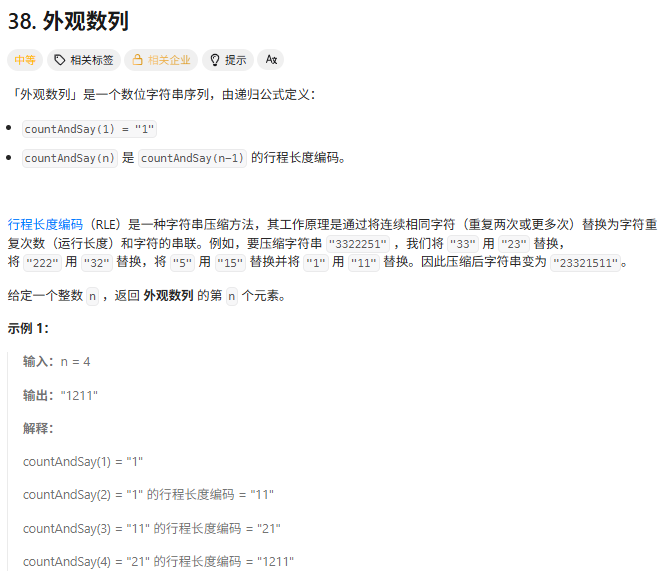

In [9]:
from typing import List
class Solution:
    """使用迭代思想求解:前一个串的行程长度编码"""
    def countAndSay(self, n:int)->str:
        if not n: return ''
        if n==1: return '1'
        str_list = self.countAndSay(n-1)
        # 定义输出字符串
        res = ''
        count = 1
        for i in range(len(str_list)):
            if i+1<=len(str_list)-1 and str_list[i] == str_list[i+1]: count+=1
            else: res += str(count)+str_list[i]; count = 1
        return res

if __name__ == '__main__':
    s = Solution()
    print(s.countAndSay(5))


111221


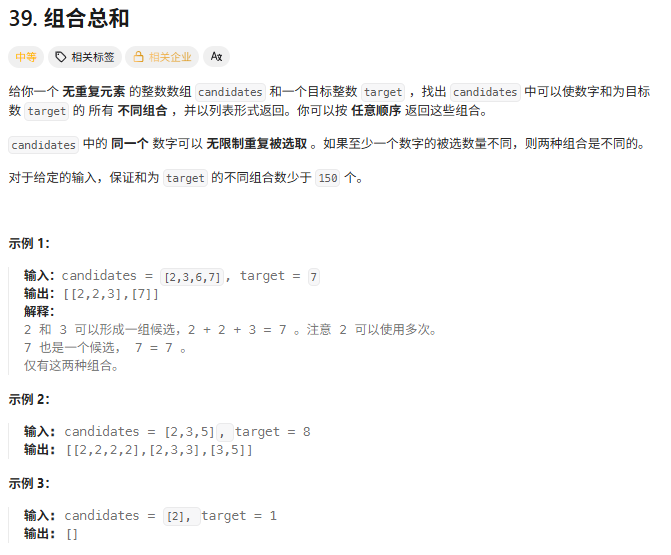  
要求找出所有可能的组合，使得这些组合中的数字和等于给定的目标值target，其中candidates数组中的元素可以被无限次选取。解决这个问题可以通过回溯算法来实现，具体来说，我们可以定义一个递归函数，该函数尝试将每个候选数字加入当前组合中，并检查是否达到目标值，如果达到则将当前组合加入结果列表，如果没有达到则继续尝试其他候选数字，直到遍历完所有可能的组合。代码实现时需要初始化一个空的结果列表和一个空的当前组合列表，然后调用递归函数从candidates的第一个元素开始尝试，每次递归调用时更新当前组合和剩余的目标值，当目标值为0时说明找到一个有效组合，将其加入结果列表，当目标值小于0或遍历完所有候选数字时返回，最终返回结果列表即可。

In [24]:
from typing import List
class Solution:
    """无限制重复选取元素: 使用回溯算法进行搜索组合target"""
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        if not candidates:  return []
        res_list = []
        # 排序有助于剪枝
        candidates.sort()  
        def backtrack(remain, start, path):
            if remain == 0:
                res_list.append(path[:]); return
            for i in range(start, len(candidates)):
                # 剪枝：后续元素都大于remain，无需再试
                if candidates[i] > remain: break  
                path.append(candidates[i])
                # 允许重复使用当前元素
                backtrack(remain - candidates[i], i, path) 
                path.pop()
        backtrack(target, 0, [])
        return res_list

if __name__ == '__main__':
    s = Solution()
    print(s.combinationSum([2,3,5],8))
        

[[2, 2, 2, 2], [2, 3, 3], [3, 5]]


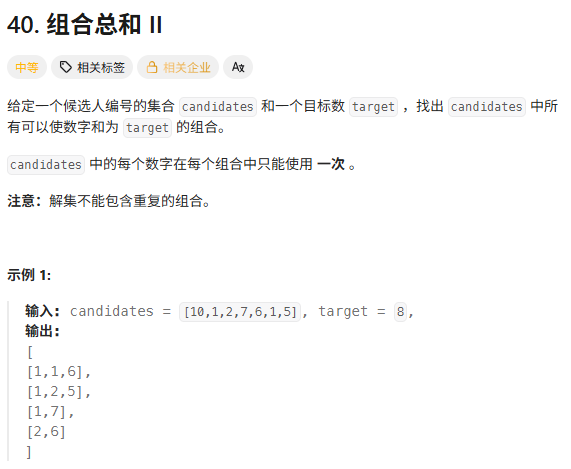  
回溯是$DFS$中常用的方法，其本质是通过递归探索问题的解空间树，在搜索过程中逐步构造解，并在发现当前路径不满足条件时，撤销上一步的选择（回溯），然后继续探索其他可能的选择。

In [5]:
from typing import List
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        # 使用回溯算法逐次搜索可能组合-耗时长
        if not candidates: return []
        candidates = [x for x in candidates if x<=target]
        candidates.sort()
        res_list = []
        def backtrack(path: List[int], start:int)->List[int]:
            # 明确终止条件
            if sum(path)==target: 
                res_list.append(path[:]); return
            for i in range(start, len(candidates)):
                # 剪枝去重
                if i>start and candidates[i]==candidates[i-1]: continue
                path.append(candidates[i])
                backtrack(path, i+1)
                path.pop() # 排除错误元素
        # 回溯搜索
        backtrack([], 0)
        return res_list

class Solution:
    #  使用回溯算法逐次搜索可能组合-优化解法
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        ans = []
        path = []
        candidates.sort()
        # 从pos下标开始选择，凑成总和target的所有方案
        def backtrack(pos, target):
            if target == 0:  # 复制出一份新的
                ans.append(list(path))
                return
            for i in range(pos, len(candidates)):
                # 不符合要求
                if target - candidates[i] < 0:
                    break
                # 跳过当前同一层的重复值--防止答案重复
                if i > pos and candidates[i] == candidates[i - 1]:
                    continue
                path.append(candidates[i])  # 选择当前数字
                backtrack(i + 1, target - candidates[i])
                path.pop()  # 恢复现场

if __name__ == '__main__':
    s = Solution()
    print(s.combinationSum2([14,6,25,9,30,20,33,34,28,30,16,12,31,9,9,12,
                            34,16,25,32,8,7,30,12,33,20,21,29,24,17,27,34,
                            11,17,30,6,32,21,27,17,16,8,24,12,12,28,11,33,
                            10,32,22,13,34,18,12],27))

[[6, 6, 7, 8], [6, 7, 14], [6, 8, 13], [6, 9, 12], [6, 10, 11], [6, 21], [7, 8, 12], [7, 9, 11], [7, 20], [8, 8, 11], [8, 9, 10], [9, 9, 9], [9, 18], [10, 17], [11, 16], [13, 14], [27]]


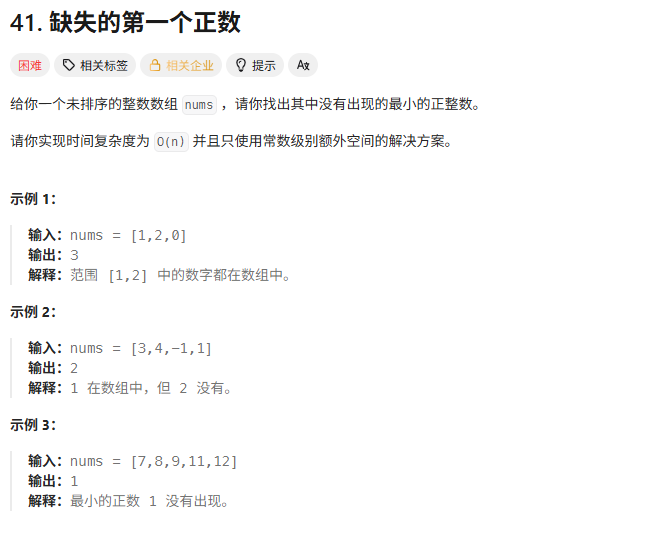  
核心思路就是根据数组的值进行交换，比如nums[i] = 5，nums的长度大于5，那么就可以直接把5换到第5的位置上面，如果nums[i]小于0或者比数组长度还大，就没有交换的必要了，需要注意的两个点，一个是待交换两个数必须不同，不然没有交换的意义，另一个是成功交换后i的值不+1，可能交换回来的数字还可以接着交换，最多交换n次，循环最多应该是2n - 1次

In [ ]:
from typing import List
class Solution:
    def firstMissingPositive(self, nums: List[int]) -> int:
        # o(n)时间复杂度则在原数组基础上进行交换
        if not nums: return 1
        if len(nums)==1 and nums[0]==1: return 2
        elif len(nums)==1 and nums[0]!=1: return 1
        for index in range(len(nums)):
            # 满足交换元素条件
            # 注意：这里仅使用for是无法保证排序的需配合while
            while 1<=nums[index]<=len(nums) and nums[index]-1!=index:
                j = nums[index]-1
                nums[j], nums[index] = nums[index], nums[j]
        for i,x in enumerate(nums): 
            # 找到nums[index]!=index+1的元素
            if i+1!=x: return i+1

class Solution:
    """优化解法:针对[1]特殊用例"""
    def firstMissingPositive(self, nums: list[int]) -> int:
        n = len(nums)
        for i in range(n):
            # 如果当前学生的学号在 [1,n] 中，但（真身）没有坐在正确的座位上
            while 1 <= nums[i] <= n and nums[i] != nums[nums[i] - 1]:
                # 那么就交换 nums[i] 和 nums[j]，其中 j 是 i 的学号
                j = nums[i] - 1  # 减一是因为数组下标从 0 开始
                nums[i], nums[j] = nums[j], nums[i]
        # 找第一个学号与座位编号不匹配的学生
        for i in range(n):
            if nums[i] != i + 1: return i + 1
        # 所有学生都坐在正确的座位上
        return n + 1
    
if __name__ == '__main__':
    s = Solution()
    print(s.firstMissingPositive([1]))

2


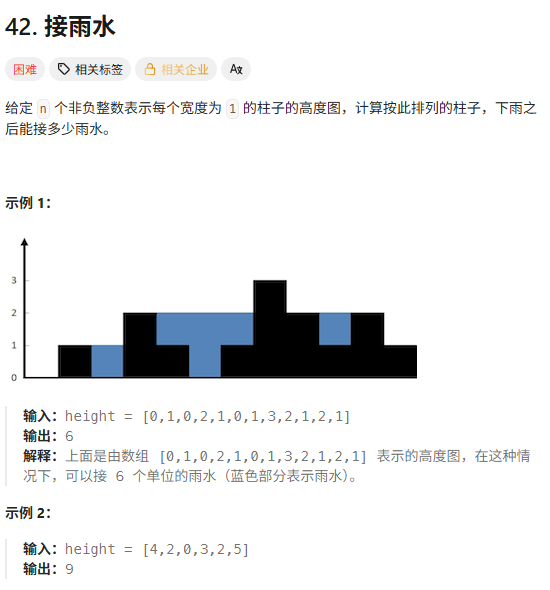  
前后缀分解:计算preMax的循环和计算ans的循环，可以合并成一个循环。时间复杂度：$O(n)$，其中$n$为height的长度。空间复杂度：$O(n)$。相向双指针:注意while循环可以不加等号，因为在「谁小移动谁」的规则下，相遇的位置一定是最高的柱子，这个柱子是无法接水的。时间复杂度：O(n)，其中 n 为 height 的长度。空间复杂度：O(1)，仅用到若干额外变量。相向双指针是一种常用的算法技巧，主要用于处理数组或字符串中的配对、查找、分割等问题。其核心思想是使用两个指针从数组的两端向中间移动，根据特定条件进行判断和操作。单调栈:相当于「横着」计算面积。这个方法可以总结成 16 个字：找上一个更大元素，在找的过程中填坑。注意 while 中加了等号，这可以让栈中没有重复元素，从而在有很多重复元素的情况下，使用更少的空间。

In [3]:
from typing import List
class Solution:
    """双向指针算法求解-左右移动来进行求解"""
    def trap(self, height: List[int])->int:
        if not height: return 0
        res = premax = sufmax = 0
        left, right = 0, len(height)-1
        # 使用双指针法判断高度
        while left<right:
            premax = max(premax, height[left])
            sufmax = max(sufmax, height[right])
            if premax<sufmax:
                res += premax-height[left]
                left += 1
            else:
                res += sufmax - height[right]
                right -= 1
        return res
    
class Solution:
    """看复杂度的话，单调栈不如双指针的做法
    但如果输入的 height 是一个流(stream)只能
    从左到右遍历，那么单调栈(在这种场景下)就是不错"""
    def trap(self, height: List[int]) -> int:
        ans = 0
        stack = list()
        n = len(height)
        for i, h in enumerate(height):
            while stack and h > height[stack[-1]]:
                top = stack.pop()
                if not stack:
                    break
                left = stack[-1]
                currWidth = i - left - 1
                currHeight = min(height[left], height[i]) - height[top]
                ans += currWidth * currHeight
            stack.append(i)
        return ans
    
if __name__ == '__main__':
    s = Solution()
    print(s.trap([0,1,0,2,1,0,1,3,2,1,2,1,9]))


11


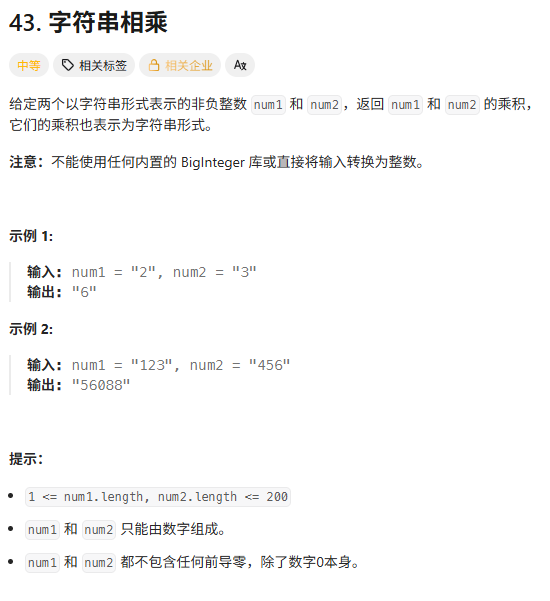  
做乘法是从右往左遍历乘数，将乘数的每一位与被乘数相乘得到对应的结果，再将每次得到的结果累加，整个过程中涉及到较多字符串相加的操作。如果使用数组代替字符串存储结果，则可以减少对字符串的操作。做加法如果num1和num2之一是 0，则直接将 0 作为结果返回即可。如果num1和num2​都不是 0，则可以通过模拟「竖式乘法」的方法计算乘积。从右往左遍历乘数，将乘数的每一位与被乘数相乘得到对应的结果，再将每次得到的结果累加。这道题中，被乘数是num1，乘数是num2。需要注意的是，num2除了最低位以外，其余的每一位的运算结果都需要补 0。

In [41]:
class Solution:
    def multiply(self, num1: str, num2: str) -> str:
        if not num1 or not num2: return None
        num1, num2 = self.str_to_nums(num1), self.str_to_nums(num2)
        res = num1 * num2
        res_str = ''
        if res==0: return '0'
        # 数字传字符串
        while(res>0):
            res_str += str(res % 10)
            res = res // 10
        return res_str[::-1]
    def str_to_nums(self, num: str)->int:
        # 将字符串转为数字
        num_length = len(num)
        str_to_num = 0
        for i in range(num_length):
            str_to_num = str_to_num + (10**i)*int(num[num_length-i-1])
        return str_to_num

if __name__ == '__main__':
    s = Solution()
    print(s.multiply('4561', '4645'))

21185845


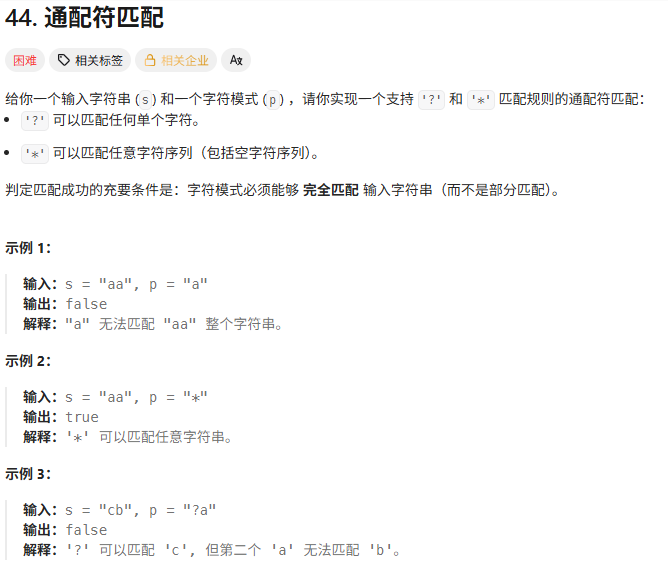  
本题与「10. 正则表达式匹配」非常类似，但相比较而言，本题稍微容易一些。因为在本题中，模式 p 中的任意一个字符都是独立的，即不会和前后的字符互相关联，形成一个新的匹配模式。因此，本题的状态转移方程需要考虑的情况会少一些。

In [45]:
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        m, n = len(s), len(p)
        dp = [[False] * (n + 1) for _ in range(m + 1)]
        dp[0][0] = True
        for i in range(1, n + 1):
            if p[i - 1] == '*':
                dp[0][i] = True
            else: break
        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if p[j - 1] == '*':
                    dp[i][j] = dp[i][j - 1] | dp[i - 1][j]
                elif p[j - 1] == '?' or s[i - 1] == p[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1]
        return dp[m][n]

if __name__ == '__main__':
    s = Solution()
    print(s.isMatch('aa', 'a'))

False


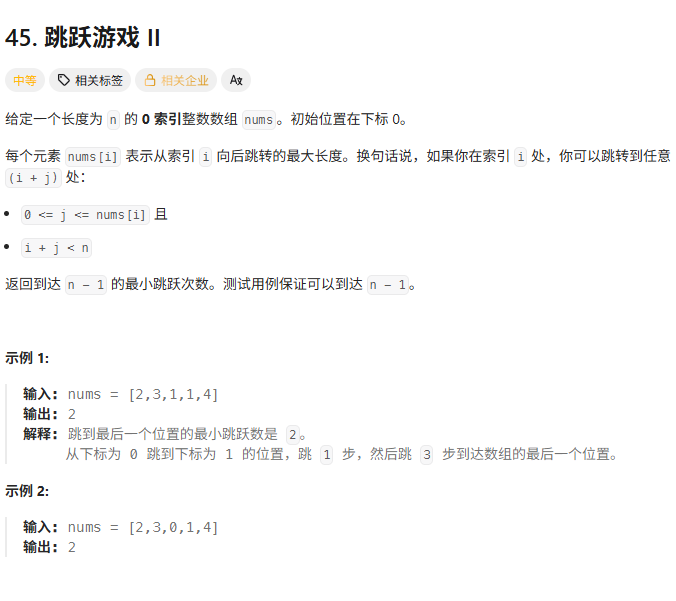

In [3]:
from typing import List
class Solution:
    def jump(self, nums: List[int]) -> int:
        position = len(nums) - 1
        steps = 0
        while position > 0:
            for i in range(position):
                if i + nums[i] >= position:
                    position = i
                    steps += 1
                    break
        return steps
    
if __name__ == '__main__':
    s = Solution()
    print(s.jump([2,3,1,1,4]))

2


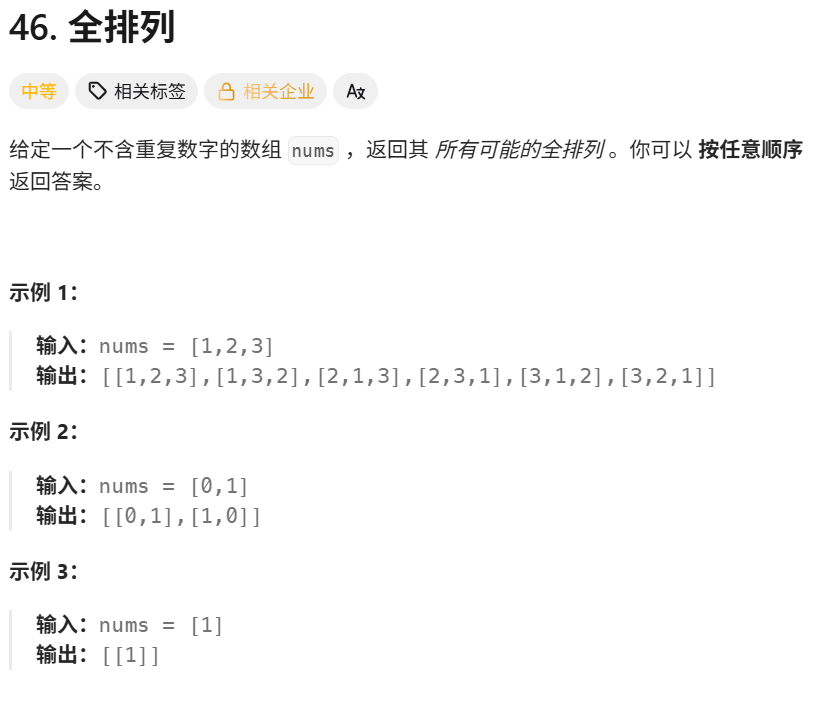

In [ ]:
from typing import List
class Solution:
    """使用全排列算法-使用回溯的深度优先搜索算法求解"""
    def permute(self, nums: List[int]) -> List[List[int]]:
        if not nums: return []
        res_list = []
        def backtrack(nums: List[int], depth:int, 
                      path:List[int], used: List[bool]):
            if depth==len(nums): 
                res_list.append(path[:])
                return
            for i in range(0, len(nums)):
                if not used[i]: 
                    used[i] = True
                    path.append(nums[i])
                    backtrack(nums, depth+1, path, used)
                    # 恢复到上一节点,保护现场
                    used[i] = False
                    path.pop()
        # 排除重复使用过的元素
        used = [False for _ in range(len(nums))]
        backtrack(nums, 0, [], used)
        return res_list

if __name__ == '__main__':
    s = Solution()
    print(s.permute([1,2,3]))

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


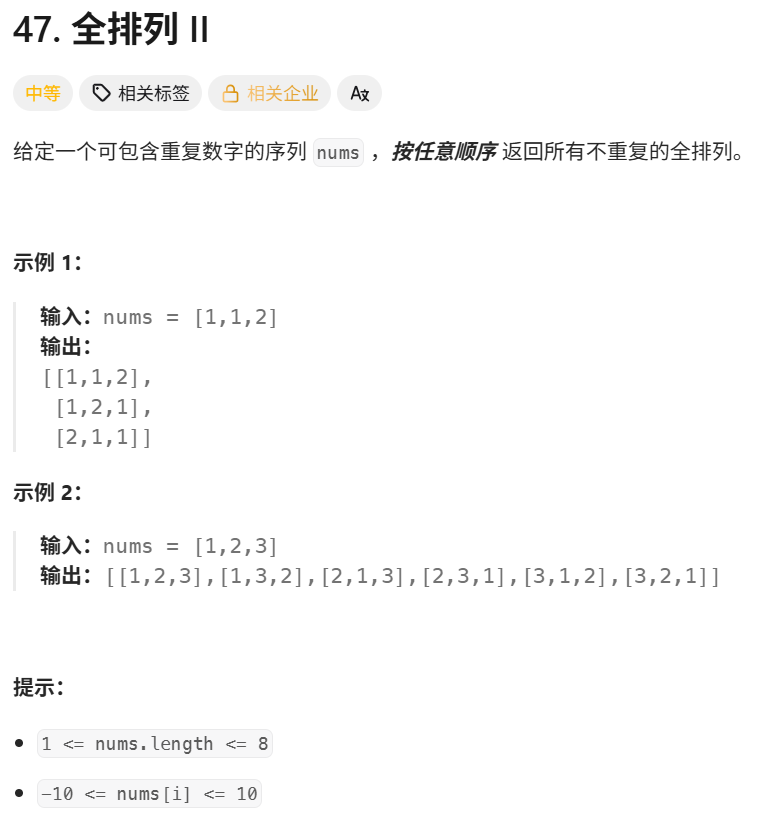

In [ ]:
from typing import List
class Solution:
    """"""
    def permuteUnique(self,nums: List[int])->List[List[int]]:
        if not nums: return []
        

In [ ]:
# 计算所机试5道题目
# 时间 11:02 - 12.02
from typing import List
from collections import Counter
class Solution:
    def FindMax(self, nums: List[int])-> int:
        """第一问"""
        max_num, min_num = 0,0
        for x in nums:
            max_num = max(max_num, x)
            min_num = min(min_num, x)
        results = []
        for i in range(1, max_num):
            if i not in nums: results.append(i)
        return results[-1]
    def CompressStr(self, s: str) -> str:
        """第二问"""
        s_list = list(set(s))
        s_count = Counter(s)
        result = ''
        for i,x in s_count.items():
            result += f'{x}{i}'
        return result
    def TurnMatrix(self, row:int, col:int, matrix:List[List[int]])->List[List[int]]:
        """第三问"""
        if not matrix: return []
        result_turn = [[matrix[j][i] for j in range(col)]for i in range(row) ] 
        result_reverse = [[matrix[i][col-j-1] for j in range(col)]for i in range(row)]
        return result_turn, result_reverse
    def ZLine(self, n: int, s:str)->str:
        """第四问"""
        result = ['']*n
        # 分n排进行模拟
        count = 0
        sign = 1 
        for c in s:
            if count == 0: sign = 1
            elif count ==n-1: sign = -1
            result[count] += c
            count += sign
        return ''.join(result)
    def ChangeStr(self, s1:str, s2:str):
        """第五问"""
        indics = []
        count_in = 0
        for x in s1:
            if x in s2: count_in +=1
        for c in s2: 
            if c not in s1: count_in+=1
        return count_in

if __name__ == '__main__':
    s = Solution()
    print(s.FindMax([3, 5, 2, 1, 6, 0, -2]))
    print(s.CompressStr('aaaabbbbbhh'))
    print(s.TurnMatrix(3, 3, [[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
    print(s.ZLine(3,'COMPUTERVISION'))
    print(s.ChangeStr('sfdxbqw','gfdgw'))

4
4a5b2h
([[1, 4, 7], [2, 5, 8], [3, 6, 9]], [[3, 2, 1], [6, 5, 4], [9, 8, 7]])
CUVOOPTRIINMES
5
